In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'xsec_momentum_genie_other_mar18/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.18/04


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_flux_momentum.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Flux variation, systematic

In [4]:
# Load input files
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)

try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"genie_other_systematic.root","RECREATE");


In [5]:
#filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_overlay = 'NuCCana_overlay_V26_mar18.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
#pot_overlay= 1.22339196540357653e+21
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	1012051
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.26811760704e+21
Overlay:	1.26811760704e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.0060278320856
Dirt:		0.0611423668132


In [6]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [7]:
if 1:
    filename_overlay = 'NuCCana_overlay_V26_mar18_noflux.rootout4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	1013969
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')

energy_cut = ' && MCle_Energy>0.15'

numu_signal = numu_signal+energy_cut
numu_true = numu_true+energy_cut
numu_nomu = numu_nomu+energy_cut
numu_lowpur = numu_lowpur+energy_cut
numu_nc = numu_nc+energy_cut
numu_ov = numu_ov+energy_cut
numu_other = numu_other+energy_cut
         
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)


True

In [12]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1

In [13]:
#weight_list_flux = [ 'AxFFCCQEshape_UBGenie', 'DecayAngMEC_UBGenie', 'NormCCCOH_UBGenie', 'NormNCCOH_UBGenie',\
#                    'RPA_CCQE_UBGenie','ThetaDelta2NRad_UBGenie','Theta_Delta2Npi_UBGenie',\
#                'VecFFCCQEshape_UBGenie' ]

weight_list_flux = [ 'AxFFCCQEshape_UBGenie', 'DecayAngMEC_UBGenie', 'NormCCCOH_UBGenie', 'NormNCCOH_UBGenie',\
               'RPA_CCQE_Reduced_UBGenie','RPA_CCQE_UBGenie','ThetaDelta2NRad_UBGenie','Theta_Delta2Npi_UBGenie',\
                'VecFFCCQEshape_UBGenie','XSecShape_CCMEC_UBGenie' ]

num_para = len(weight_list_flux)
print 'Nuber of parameters: ',num_para
#weight_list_genie_other = [ 'AxFFCCQEshape_Genie', 'DecayAngMEC_Genie', 'MaNCRES_Genie', 'Theta_Delta2Npi_Genie', 'VecFFCCQEshape_Genie' ]

Nuber of parameters:  10


In [14]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
num_universes = 2
eff_uni = np.zeros((num_para,num_universes))
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1

In [15]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

def draw_adding_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .91,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/15.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [16]:
#path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_genie_other/pc46/script_output/'
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_genie_other_mar18/'
f = ROOT.TFile.Open(path+"Genie_other_momentum.root", 'read')
#h_data_mom = f.Get("h_data_mom")
#h_data_mom.Draw()
#c1.Draw()
#h_data_mom.GetEntries()

In [17]:

h_ext_mom = f.Get("h_ext_mom")
h_data_mom = f.Get("h_data_mom")
h_dirt_mom = f.Get("h_dirt_mom")

bkg_ext = h_ext_mom.Integral(0,binnum+1)
num_data = h_data_mom.Integral(0,binnum+1)
bkg_dirt = h_dirt_mom.Integral(1,binnum)
print 'Data: ', num_data,' Ext: ', bkg_ext,' Dirt: ',bkg_dirt
bkg_dirt = h_dirt_mom.Integral(0,binnum+1)
print 'Data: ', num_data,' Ext: ', bkg_ext,' Dirt: ',bkg_dirt
bkg_dirt = h_dirt_mom.Integral(-1,binnum+1)
print 'Data: ', num_data,' Ext: ', bkg_ext,' Dirt: ',bkg_dirt
#bkg_dirt = h_dirt_mom.GetSumOfWeights()
#print 'Data: ', num_data,' Ext: ', bkg_ext,' Dirt: ',bkg_dirt
sum = 0.0
for i in range(0,binnum+2):
    print i,h_dirt_mom.GetBinContent(i)
    sum = sum+h_dirt_mom.GetBinContent(i)
print sum

Data:  1348.0  Ext:  142.179032326  Dirt:  32.0686820745
Data:  1348.0  Ext:  142.179032326  Dirt:  32.1298244409
Data:  1348.0  Ext:  142.179032326  Dirt:  32.1298244409
0 0.0
1 1.80853796005
2 9.51224708557
3 9.06838226318
4 7.40795373917
5 2.35809493065
6 1.91346609592
7 0.0611423663795
32.1298244409


In [18]:

variable = 'MCle_Energy'
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_1d = []
h_1d_true = []

for para in range(num_para):
    h_1d.append([])
    h_1d_true.append([])
    for uni in range(num_universes):
        h_1d[para].append(f.Get('h_1d['+str(para)+']['+str(uni)+']'))
        h_1d_true[para].append( f.Get('h_1d_true['+str(para)+']['+str(uni)+']' ))

for para in range(num_para): 
    print 'Get efficiency of Parameter: ', weight_list_flux[para]
    for uni in range(num_universes):
        #globale.overlay_out.Draw(variable+'>>h_1d['+str(para)+']['+str(uni)+']',weight_name+'*'+weight_list_flux[para]+'['+str(uni)+']*('+cut+'&& numu_signal)')
        #globale.overlay_out.Draw(variable+'>>h_1d_true['+str(para)+']['+str(uni)+']',weight_name+'*'+weight_list_flux[para]+'['+str(uni)+']*(numu_true)')
        num_signal = h_1d[para][uni].Integral(0,binnum+1)
        num_true = h_1d_true[para][uni].Integral(0,binnum+1)
        eff_uni[para][uni] = num_signal/(num_true+0.0001)
        #h_1d[para][uni].Write('h_1d['+str(para)+']['+str(uni)+']')
        #h_1d_true[para][uni].Write('h_1d_true['+str(para)+']['+str(uni)+']')
        print 'Parameter: ', weight_list_flux[para], ' Universe: ', uni, ' number of signal: ', num_signal,' True: ', num_true,' Eff: ',eff_uni[para][uni]
# save the efficiencies
#np.save(output_filedir+'xsec_flux_tot_efficiencies',eff_uni)
print 'Total std of efficiency (all parameters, all universes)',eff_uni.std()

Get efficiency of Parameter:  AxFFCCQEshape_UBGenie
Parameter:  AxFFCCQEshape_UBGenie  Universe:  0  number of signal:  161493.934937  True:  290077.891357  Eff:  0.5567261059611908
Parameter:  AxFFCCQEshape_UBGenie  Universe:  1  number of signal:  161357.273193  True:  290094.446533  Eff:  0.5562232406240452
Get efficiency of Parameter:  DecayAngMEC_UBGenie
Parameter:  DecayAngMEC_UBGenie  Universe:  0  number of signal:  161688.756226  True:  290594.051025  Eff:  0.5564076607879961
Parameter:  DecayAngMEC_UBGenie  Universe:  1  number of signal:  161357.273193  True:  290094.446533  Eff:  0.5562232406240452
Get efficiency of Parameter:  NormCCCOH_UBGenie
Parameter:  NormCCCOH_UBGenie  Universe:  0  number of signal:  161702.268555  True:  290605.480225  Eff:  0.5564322750350901
Parameter:  NormCCCOH_UBGenie  Universe:  1  number of signal:  161357.273193  True:  290094.446533  Eff:  0.5562232406240452
Get efficiency of Parameter:  NormNCCOH_UBGenie
Parameter:  NormNCCOH_UBGenie  Uni

In [19]:
variable = 'TrackMomMCS_mom'
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

bkg_uni = np.zeros((num_para,num_universes))
h_1d_bkg = []
for para in range(num_para):
    h_1d_bkg.append([])
    for uni in range(num_universes):
        #print 'At universe: ',uni
        h_1d_bkg[para].append( f.Get('h_1d_bkg['+str(para)+']['+str(uni)+']') )

for para in range(num_para):
    print 'Get background of Parameter: ', weight_list_flux[para]
    for uni in range(num_universes):
        #globale.overlay_out.Draw(variable+'>>h_1d_bkg['+str(para)+']['+str(uni)+']',weight_name+'*'+weight_list_flux[para]+'['+str(uni)+']*('+cut+'&& !numu_signal)')
        #h_1d_bkg[para][uni].Scale(globale.scale[globale.overlay])
        bkg_uni[para][uni] = h_1d_bkg[para][uni].Integral(0,binnum+1)
        #h_1d_bkg[para][uni].Write('h_1d_bkg['+str(para)+']['+str(uni)+']')
        #print 'Parameter: ', weight_list_flux[para], ' Universe: ', uni, ' Overlay: ',bkg_uni[para][uni]


Get background of Parameter:  AxFFCCQEshape_UBGenie
Get background of Parameter:  DecayAngMEC_UBGenie
Get background of Parameter:  NormCCCOH_UBGenie
Get background of Parameter:  NormNCCOH_UBGenie
Get background of Parameter:  RPA_CCQE_Reduced_UBGenie
Get background of Parameter:  RPA_CCQE_UBGenie
Get background of Parameter:  ThetaDelta2NRad_UBGenie
Get background of Parameter:  Theta_Delta2Npi_UBGenie
Get background of Parameter:  VecFFCCQEshape_UBGenie
Get background of Parameter:  XSecShape_CCMEC_UBGenie


In [20]:
xsec_uni = np.zeros((num_para,num_universes))
       
xsec_std = np.zeros((num_para))
xsec_mean = np.zeros((num_para))
xsec_diff = np.zeros((num_para))
#xsec_CV = 8.00835474027e-39 
xsec_diff_tot = 0.0
print num_data,bkg_ext,bkg_dirt,N_tot,beam_flux

for para in range(num_para):
    for uni in range(num_universes):
        signal = num_data - bkg_ext - bkg_dirt - bkg_uni[para][uni]
        xsec_uni[para][uni] = (num_data - bkg_ext - bkg_dirt - bkg_uni[para][uni])/(eff_uni[para][uni] * N_tot * beam_flux)
        #print 'Parameter: ', weight_list_flux[para], ' Universe: ', uni, ' Total fulux integrated xsec: ',xsec_uni[para][uni]
    xsec_diff[para] = (xsec_uni[para][0] - xsec_uni[para][1])
    #print 'Parameter: %25s'% weight_list_flux[para], ' mean: {0:0.3e}%'.format(xsec_uni[para][0]), ' deviation: {0:0.3e}%'.format(xsec_uni[para][0]-xsec_uni[para][1]),' in percent: {0:0.3f}%'.format((xsec_uni[para][0]-xsec_uni[para][1])/xsec_uni[para][0]*100,'%')
    print '%25s'% weight_list_flux[para], '& {0:0.3e}'.format(xsec_uni[para][0]),' & {0:0.3f}%'.format((xsec_uni[para][0]-xsec_uni[para][1])/xsec_uni[para][0]*100,'%')
    xsec_diff_tot = xsec_diff_tot + xsec_diff[para]*xsec_diff[para]
    
xsec_diff_tot = math.sqrt(xsec_diff_tot)
print 'Total flux errorin percent: {0:0.5f}%'.format(xsec_diff_tot*100.0/xsec_uni[0][0],'%')

1348.0 142.179032326 32.1298244409 4.10331109202e+31 5640491186.57
    AxFFCCQEshape_UBGenie & 7.560e-39  & -0.061%
      DecayAngMEC_UBGenie & 7.559e-39  & -0.083%
        NormCCCOH_UBGenie & 7.558e-39  & -0.090%
        NormNCCOH_UBGenie & 7.564e-39  & -0.012%
 RPA_CCQE_Reduced_UBGenie & 7.537e-39  & -0.739%
         RPA_CCQE_UBGenie & 7.519e-39  & -1.234%
  ThetaDelta2NRad_UBGenie & 7.565e-39  & 0.000%
  Theta_Delta2Npi_UBGenie & 7.499e-39  & -0.882%
   VecFFCCQEshape_UBGenie & 7.542e-39  & -0.306%
  XSecShape_CCMEC_UBGenie & 7.585e-39  & 0.356%
Total flux errorin percent: 1.74724%


In [21]:
# check standard deviations on the true efficiency
#np.std(eff_uni)
#Since the efficiency does not change very much per universe the nominal efficiency e_tilde is used
# in order not to calculated the whole detector smearing again
#eff_tilde = np.load('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'+'eff_tilde_momentum_xsec_CV.npy')
#print input_filedir
#print eff_tilde

In [22]:

h_eff_true = []
h_eff_tilde = []
for para in range(num_para):
    h_eff_tilde.append([])
    h_eff_true.append([])
    for uni in range(num_universes):
        #print 'At universe: ',uni
        h_eff_tilde[para].append( f.Get('h_eff_tilde['+str(para)+']['+str(uni)+']') ) 
        h_eff_true[para].append( f.Get('h_eff_true['+str(para)+']['+str(uni)+']') ) 

In [23]:
'''
for para in range(num_para):
    xsec_uni_bin = np.zeros((num_universes,binnum))
    #print para
    for uni in range(num_universes):
        #print uni
        for i in range(binnum):
            xsec_uni_bin[uni][i] = h_data_mom.GetBinContent(i+1) - h_ext_mom.GetBinContent(i+1) - h_dirt_mom.GetBinContent(i+1) - h_1d_bkg[para][uni].GetBinContent(i+1)
            xsec_uni_bin[uni][i] = xsec_uni_bin[uni][i]/(eff_tilde[i] * N_tot * beam_flux * h_data_mom.GetBinWidth(i+1))
    #print xsec_uni_bin
        #if xsec_uni_bin[uni][i] == 0:
        #    print 

    xsec_std_bin = np.std(xsec_uni_bin,axis=0)
    #print xsec_uni_bin
    np.save(output_filedir+'xsec_'+weight_list_flux[para]+'_momentum',xsec_std_bin)'''

"\nfor para in range(num_para):\n    xsec_uni_bin = np.zeros((num_universes,binnum))\n    #print para\n    for uni in range(num_universes):\n        #print uni\n        for i in range(binnum):\n            xsec_uni_bin[uni][i] = h_data_mom.GetBinContent(i+1) - h_ext_mom.GetBinContent(i+1) - h_dirt_mom.GetBinContent(i+1) - h_1d_bkg[para][uni].GetBinContent(i+1)\n            xsec_uni_bin[uni][i] = xsec_uni_bin[uni][i]/(eff_tilde[i] * N_tot * beam_flux * h_data_mom.GetBinWidth(i+1))\n    #print xsec_uni_bin\n        #if xsec_uni_bin[uni][i] == 0:\n        #    print \n\n    xsec_std_bin = np.std(xsec_uni_bin,axis=0)\n    #print xsec_uni_bin\n    np.save(output_filedir+'xsec_'+weight_list_flux[para]+'_momentum',xsec_std_bin)"

In [24]:
# save the total difference in percent
#np.save(output_filedir+'xsec_percent_diff_momentum',xsec_std_bin)

In [25]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

In [26]:
# load CV values
#path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_filesV4/'
#f_cv = ROOT.TFile.Open(path+"xsec_momentum_wighted.root", 'read')
#h_cv_ = f_cv.Get("h_xsec_data")
#h_cv_.Scale(1e-38)


In [27]:
h_1d_xsec = []
print num_universes
for para in range(num_para):
    h_1d_xsec.append([])
    for uni in range(num_universes):
        #print 'At universe: ',uni
        h_1d_xsec[para].append( ROOT.TH1F('h_1d_xsec['+str(para)+']['+str(uni)+']',"xsec momentum",binnum,array('f',mom_bins)) )

legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT

for para in range(num_para):#num_para
    for uni in range(num_universes):    #num_universes 
        #xsec_uni_bin[uni][i] = h_data_mom.GetBinContent(i+1) - h_ext_mom.GetBinContent(i+1) - h_dirt_mom.GetBinContent(i+1) - h_1d_bkg[para][uni].GetBinContent(i+1)
        #xsec_uni_bin[uni][i] = xsec_uni_bin[uni][i]/(eff_tilde[i] * N_tot * beam_flux * h_data_mom.GetBinWidth(i+1))
        h_1d_xsec[para][uni] = h_data_mom.Clone()
        h_1d_xsec[para][uni].Add(h_ext_mom,-1)
        h_1d_xsec[para][uni].Add(h_dirt_mom,-1)
        h_1d_xsec[para][uni].Add(h_1d_bkg[para][uni],-1)
        h_1d_xsec[para][uni].Scale(1.0/(N_tot * beam_flux ))
        h_1d_xsec[para][uni].SetLineColor(para+2)
        if(para+2==10):
            h_1d_xsec[para][uni].SetLineColor(30)
        h_1d_xsec[para][uni].SetLineWidth(3)
        h_1d_xsec[para][uni].Divide(h_eff_tilde[para][uni])
        for i in range(1,binnum+1):
            value = h_1d_xsec[para][uni].GetBinContent(i)
            width = h_1d_xsec[para][uni].GetBinWidth(i)
            h_1d_xsec[para][uni].SetBinContent(i,value/(width))
            h_1d_xsec[para][uni].SetBinError(i,h_1d_xsec[para][uni].GetBinError(i)/(width))
            #if i == 2:
            #print value/width, value, width
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
        

2


In [28]:
for i in range(1,binnum+1):
    print h_1d_xsec[para][uni].GetBinContent(i),h_1d_xsec[para][uni].GetBinError(i)

7.01995879987e-40 4.27327489183e-40
9.83820122587e-39 1.34667931418e-39
1.07872530316e-38 1.03607668414e-39
9.64042196062e-39 5.26549579277e-40
2.91218967895e-39 2.06405741796e-40
1.8055590583e-40 3.45556835434e-41


In [29]:
#h_cv = ROOT.TH1F('h_1d_xsec['+str(0)+']['+str(0)+']',"xsec momentum",binnum,array('f',mom_bins)) 
h_cv = h_1d_xsec[0][0].Clone()
h_cv.SetLineColor(ROOT.kBlack)


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/png/h_eff_true_genie_other.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/root/h_eff_true_genie_other.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/pdf/h_eff_true_genie_other.pdf has been created


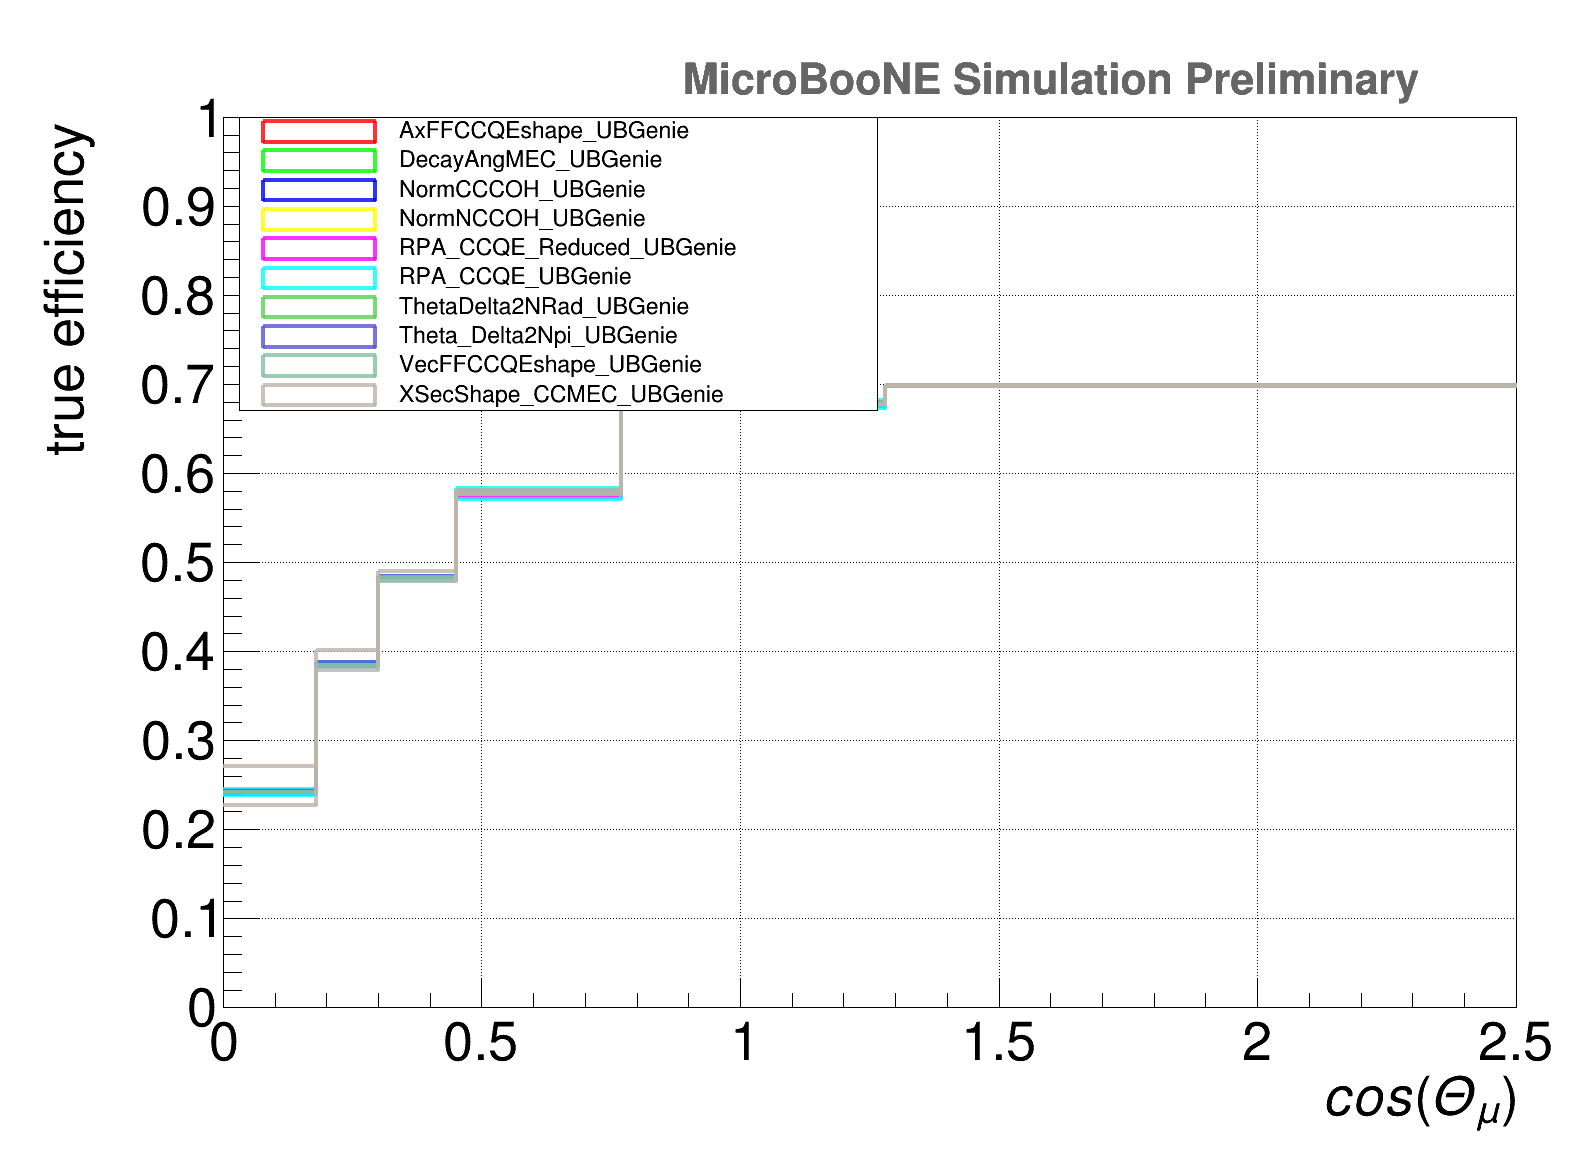

In [30]:
#legend.AddEntry(h_cv,'CV',"f")
#h_cv.SetLineWidth(3)
legend = ROOT.TLegend(0.15,0.65,0.55,0.9); #LEGEND RIGHT
h_eff_true[0][0].SetYTitle("true efficiency")
h_eff_true[0][0].SetXTitle("cos(\Theta_{\mu})")
h_eff_true[0][0].GetYaxis().SetTitleSize(0.05)
h_eff_true[0][0].GetYaxis().SetTitleOffset(0.0)
h_eff_true[0][0].GetYaxis().SetLabelSize(0.05)
h_eff_true[0][0].GetXaxis().SetTitleSize(0.05)
h_eff_true[0][0].GetXaxis().SetLabelSize(0.05)
h_eff_true[0][0].GetXaxis().SetTitleOffset(1)
h_eff_true[0][0].SetLineColor(ROOT.kBlack)
h_eff_true[0][0].SetLineWidth(4)
#ROOT.gStyle.SetEndErrorSize(5)
h_eff_true[0][0].Draw('HIST')
for para in range(num_para):
    legend.AddEntry(h_eff_true[para][uni],weight_list_flux[para],"f")
    for uni in range(num_universes):      
        h_eff_true[para][uni].SetLineColorAlpha(para+2,0.8)
        if(para+2==10):
            h_eff_true[para][uni].SetLineColorAlpha(30,0.8)
        h_eff_true[para][uni].SetLineWidth(4)
        h_eff_true[para][uni].SetMaximum(1)
        h_eff_true[para][uni].SetMinimum(0)
    
        h_eff_true[para][uni].Draw('HIST same ')
        #h_1d_xsec[para][uni]..SetMaximum(1.6)
        #print h_1d_xsec[para][uni].GetBinContent(3),' - ', h_1d_bkg[para][uni].GetBinContent(3)
legend.Draw()
#h_eff_true[0][0].Draw('HIST')
#h_eff_true[0][1].Draw('HIST same')

#h_cv.Draw('HIST E1 same')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_true_genie_other.png")
c1.SaveAs(outputdir_root + "h_eff_true_genie_other.root")
c1.SaveAs(outputdir_pdf + "h_eff_true_genie_other.pdf")


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/png/h_eff_tilde_genie_other.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/root/h_eff_tilde_genie_other.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/pdf/h_eff_tilde_genie_other.pdf has been created


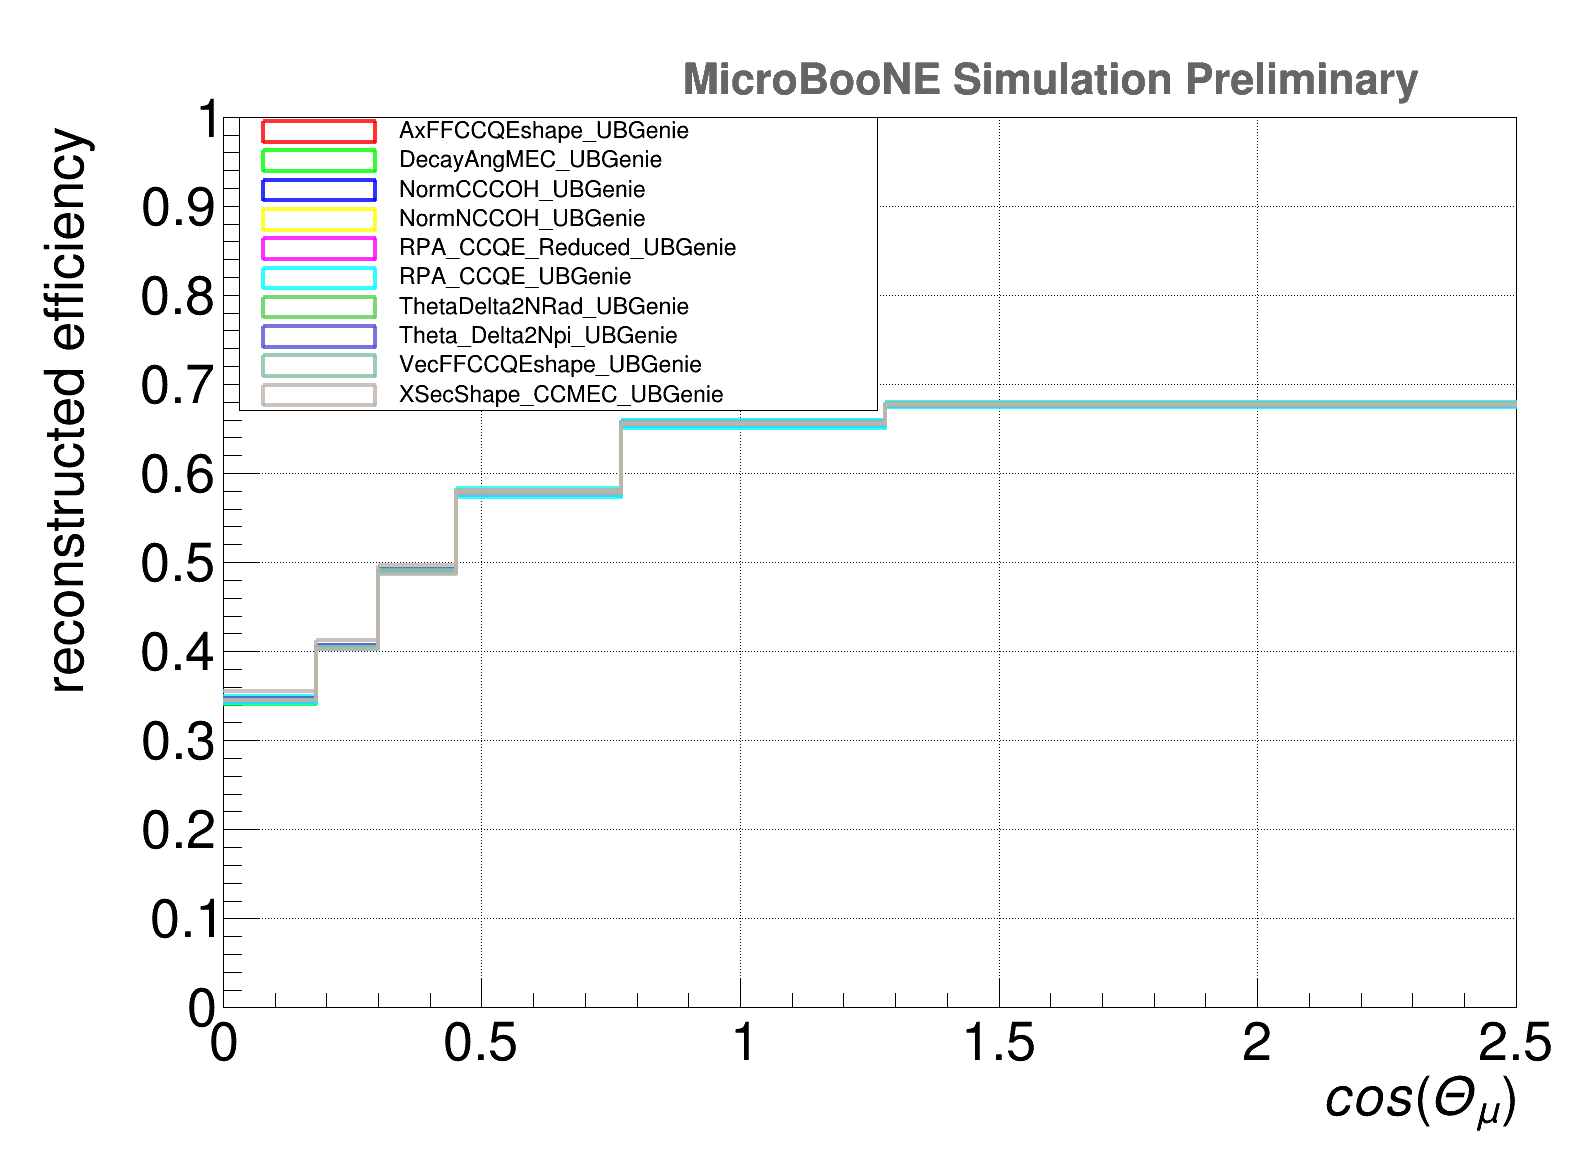

In [31]:
#legend.AddEntry(h_cv,'CV',"f")
#h_cv.SetLineWidth(3)
legend = ROOT.TLegend(0.15,0.65,0.55,0.9); #LEGEND RIGHT
h_eff_tilde[0][0].SetYTitle("reconstructed efficiency")
h_eff_tilde[0][0].SetXTitle("cos(\Theta_{\mu})")
h_eff_tilde[0][0].GetYaxis().SetTitleSize(0.05)
h_eff_tilde[0][0].GetYaxis().SetTitleOffset(0.0)
h_eff_tilde[0][0].GetYaxis().SetLabelSize(0.05)
h_eff_tilde[0][0].GetXaxis().SetTitleSize(0.05)
h_eff_tilde[0][0].GetXaxis().SetLabelSize(0.05)
h_eff_tilde[0][0].GetXaxis().SetTitleOffset(1)
h_eff_tilde[0][0].SetLineColor(ROOT.kBlack)
h_eff_tilde[0][0].SetLineWidth(4)
#ROOT.gStyle.SetEndErrorSize(5)
h_eff_tilde[0][0].Draw('HIST')
for para in range(num_para):
    legend.AddEntry(h_eff_tilde[para][uni],weight_list_flux[para],"f")
    for uni in range(num_universes):      
        h_eff_tilde[para][uni].SetLineColorAlpha(para+2,0.8)
        if(para+2==10):
            h_eff_tilde[para][uni].SetLineColorAlpha(30,0.8)
        h_eff_tilde[para][uni].SetLineWidth(4)
        h_eff_tilde[para][uni].SetMaximum(1)
        h_eff_tilde[para][uni].SetMinimum(0)
    
        h_eff_tilde[para][uni].Draw('HIST same ')
        #h_1d_xsec[para][uni]..SetMaximum(1.6)
        #print h_1d_xsec[para][uni].GetBinContent(3),' - ', h_1d_bkg[para][uni].GetBinContent(3)
legend.Draw()
#h_cv.Draw('HIST E1 same')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_genie_other.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_genie_other.root")
c1.SaveAs(outputdir_pdf + "h_eff_tilde_genie_other.pdf")


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/png/h_1d_bkgd_genie_other.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/root/h_1d_bkgd_genie_other.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/pdf/h_1d_bkgd_genie_other.pdf has been created


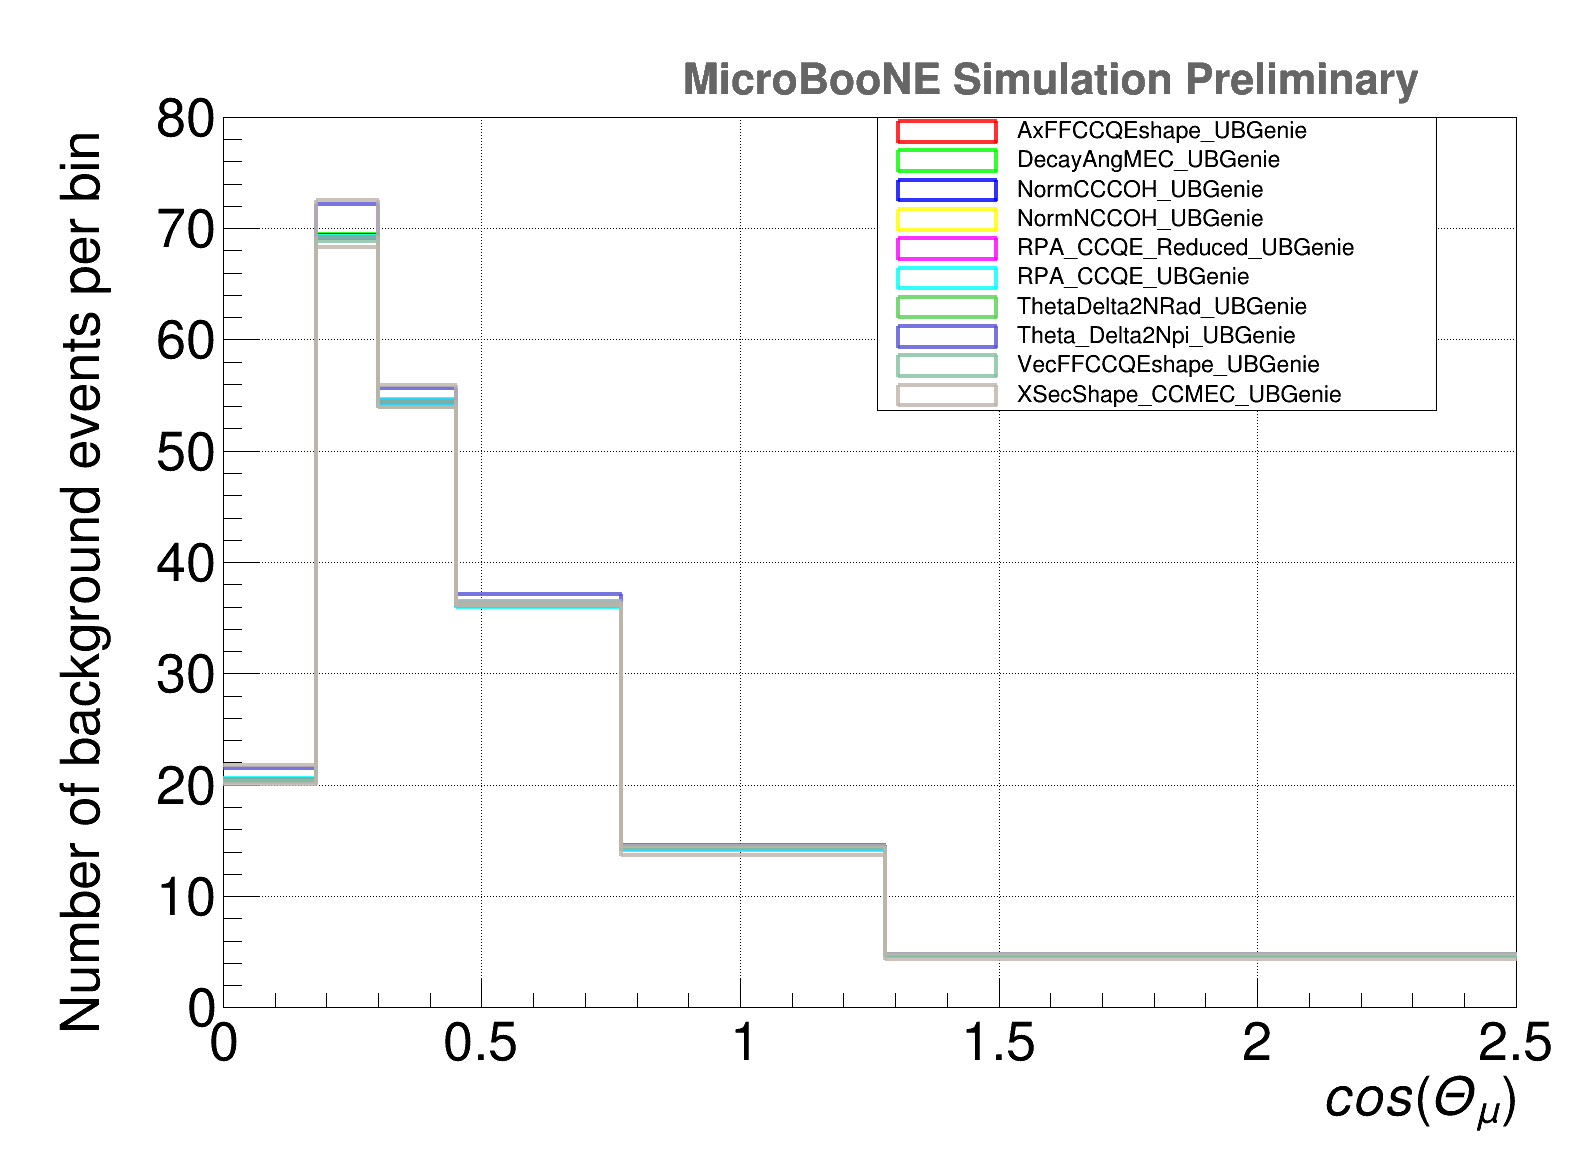

In [32]:
#legend.AddEntry(h_cv,'CV',"f")
#h_cv.SetLineWidth(3)
legend = ROOT.TLegend(0.55,0.65,0.9,0.9); #LEGEND RIGHT
h_1d_bkg[0][0].SetYTitle("Number of background events per bin")
h_1d_bkg[0][0].SetXTitle("cos(\Theta_{\mu})")
h_1d_bkg[0][0].GetYaxis().SetTitleSize(0.05)
h_1d_bkg[0][0].GetYaxis().SetTitleOffset(0.0)
h_1d_bkg[0][0].GetYaxis().SetLabelSize(0.05)
h_1d_bkg[0][0].GetXaxis().SetTitleSize(0.05)
h_1d_bkg[0][0].GetXaxis().SetLabelSize(0.05)
h_1d_bkg[0][0].GetXaxis().SetTitleOffset(1)
h_1d_bkg[0][0].SetLineColor(ROOT.kBlack)
h_1d_bkg[0][0].SetLineWidth(4)
#ROOT.gStyle.SetEndErrorSize(5)
h_1d_bkg[0][0].Draw('HIST')
for para in range(num_para):
    legend.AddEntry(h_1d_bkg[para][uni],weight_list_flux[para],"f")
    for uni in range(num_universes):      
        h_1d_bkg[para][uni].SetLineColorAlpha(para+2,0.8)
        if(para+2==10):
            h_1d_bkg[para][uni].SetLineColorAlpha(30,0.8)
        h_1d_bkg[para][uni].SetLineWidth(4)
        h_1d_bkg[para][uni].SetMaximum(80)
        h_1d_bkg[para][uni].SetMinimum(0)
    
        h_1d_bkg[para][uni].Draw('HIST same ')
        #h_1d_xsec[para][uni]..SetMaximum(1.6)
        #print h_1d_xsec[para][uni].GetBinContent(3),' - ', h_1d_bkg[para][uni].GetBinContent(3)
legend.Draw()
#h_cv.Draw('HIST E1 same')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_1d_bkgd_genie_other.png")
c1.SaveAs(outputdir_root + "h_1d_bkgd_genie_other.root")
c1.SaveAs(outputdir_pdf + "h_1d_bkgd_genie_other.pdf")


In [33]:
xsec_cov_matrix = np.zeros((binnum,binnum)) # covariance matrix
xsec_corr_matrix = np.zeros((binnum,binnum)) # correlation matrix
xsec_frac_cov_matrix = np.zeros((binnum,binnum)) # fractional covariance matrix

for para in range(num_para):#num_para
    if para!=9 and para!=4: #para!= 4 and 
        print para, weight_list_flux[para],' normal weight'
        for uni in range(1):    #num_universes 
            xsec_diff_matrix = np.zeros((binnum))
            xsec_diff_matrix_1 = np.zeros((binnum))
            for i in range(1,binnum+1):
                xsec_var0 = h_1d_xsec[para][0].GetBinContent(i)
                xsec_var1 = h_1d_xsec[para][1].GetBinContent(i)
                #print xsec_var0,xsec_var1,xsec_var0-xsec_var1
                #xsec_cv = h_cv.GetBinContent(i)
                xsec_diff_matrix[i-1] = xsec_var0 - xsec_var1
                xsec_diff_matrix_1[i-1] = (xsec_var0 - xsec_var1)/(xsec_var1+1e-80)
            xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(binnum,1) * xsec_diff_matrix
            xsec_frac_cov_matrix = xsec_frac_cov_matrix + xsec_diff_matrix_1.reshape(binnum,1) * xsec_diff_matrix_1
    else:
        #print para, weight_list_flux[para],' special weight'
        if para==99:   
            print para, weight_list_flux[para],' special weight -> full accounted'
            for uni in range(1):    #num_universes 
                xsec_diff_matrix = np.zeros((binnum))
                xsec_diff_matrix_1 = np.zeros((binnum))
                for i in range(1,binnum+1):
                    xsec_var0 = h_1d_xsec[para][0].GetBinContent(i)
                    xsec_var1 = h_1d_xsec[para][1].GetBinContent(i)
                    #xsec_cv = h_cv.GetBinContent(i)
                    xsec_diff_matrix[i-1] = xsec_var0 - xsec_var1
                    xsec_diff_matrix_1[i-1] = (xsec_var0 - xsec_var1)/(xsec_var1+1e-80)
                xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(binnum,1) * xsec_diff_matrix
                xsec_frac_cov_matrix = xsec_frac_cov_matrix + xsec_diff_matrix_1.reshape(binnum,1) * xsec_diff_matrix_1
        if para==9:   
            print para, weight_list_flux[para],' special weight -> igonred'      
        if para==4:  
            print para, weight_list_flux[para],' special weight -> ignored'
            
for i in range(binnum):
    for j in range(binnum):
        xsec_corr_matrix[i][j] = xsec_cov_matrix[i][j]/(math.sqrt(xsec_cov_matrix[i][i]*xsec_cov_matrix[j][j]))
    

0 AxFFCCQEshape_UBGenie  normal weight
1 DecayAngMEC_UBGenie  normal weight
2 NormCCCOH_UBGenie  normal weight
3 NormNCCOH_UBGenie  normal weight
4 RPA_CCQE_Reduced_UBGenie  special weight -> ignored
5 RPA_CCQE_UBGenie  normal weight
6 ThetaDelta2NRad_UBGenie  normal weight
7 Theta_Delta2Npi_UBGenie  normal weight
8 VecFFCCQEshape_UBGenie  normal weight
9 XSecShape_CCMEC_UBGenie  special weight -> igonred


In [34]:
RootFile = ROOT.TFile(output_filedir+"genie_other_systematic.root","RECREATE");

656

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/png/h_covariance_genie_other.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/root/h_covariance_genie_other.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/pdf/h_covariance_genie_other.pdf has been created


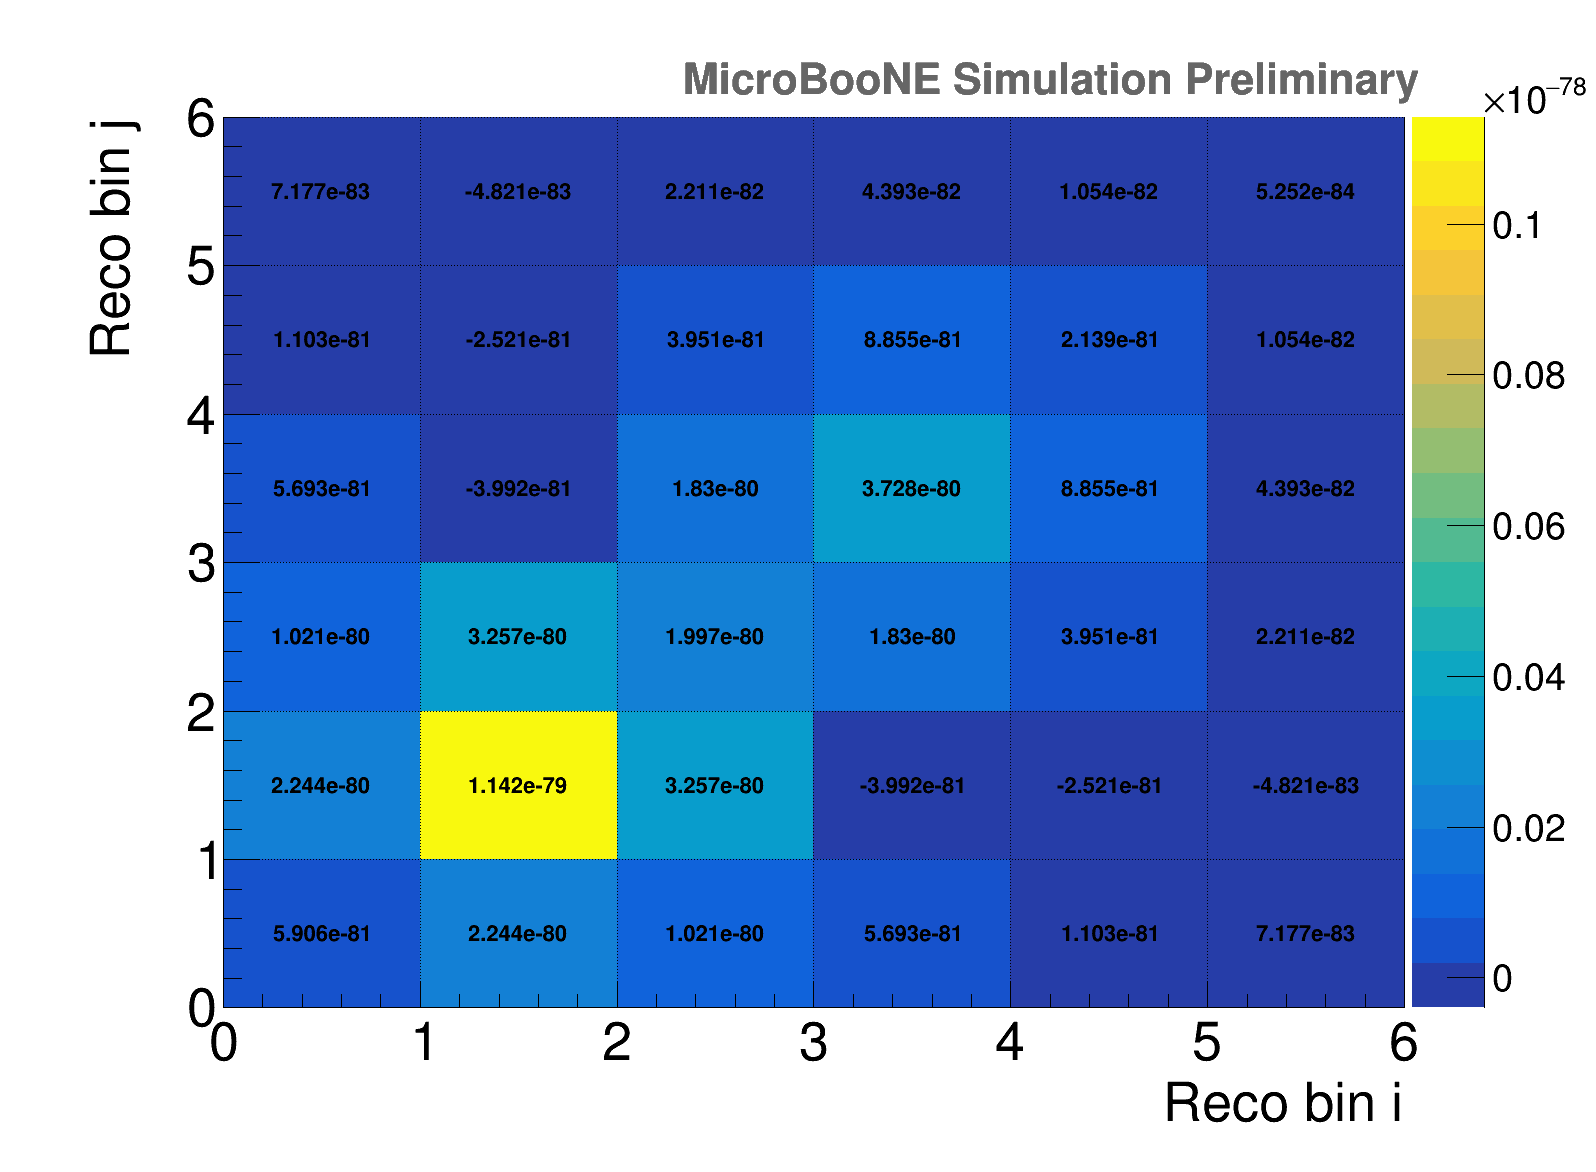

In [35]:
ROOT.gStyle.SetPaintTextFormat('0.3g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix',6,0,6,6,0,6)
for i in range(binnum):
    for j in range(binnum):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
#h_covariance.SetMinimum(-1)
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
#ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4g')
h_covariance.Draw('colz')
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_genie_other.png")
c1.SaveAs(outputdir_root + "h_covariance_genie_other.root")
c1.SaveAs(outputdir_pdf + "h_covariance_genie_other.pdf")
h_covariance.Write('h_covariance')

712

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/png/h_frac_covariance_genie_other.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/root/h_frac_covariance_genie_other.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/pdf/h_frac_covariance_genie_other.pdf has been created


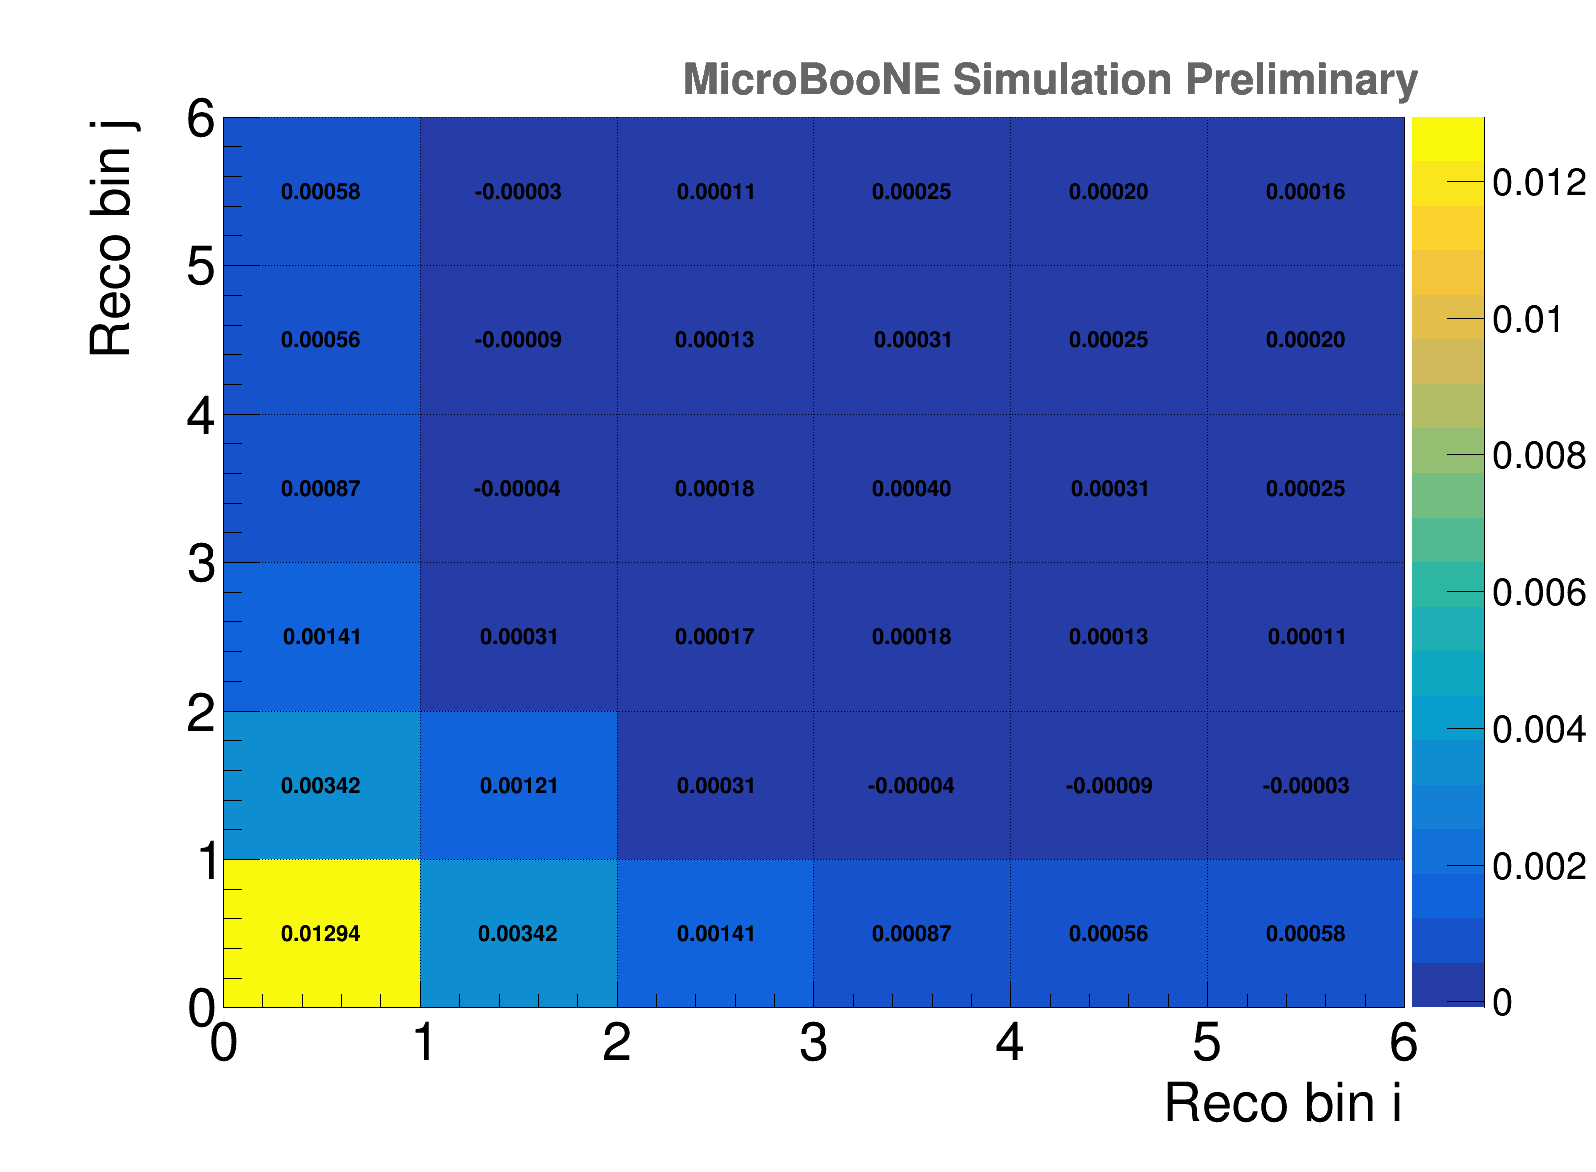

In [36]:
ROOT.gStyle.SetPaintTextFormat('0.5f')
h_frac_covariance = ROOT.TH2D("h_frac_covariance",'Fractional covariance matrix',6,0,6,6,0,6)
for i in range(binnum):
    for j in range(binnum):
        h_covariance.SetBinContent(i+1,j+1,xsec_frac_cov_matrix[i,j])
#h_covariance.SetMinimum(-1)
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
#ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.5f')
h_covariance.Draw('colz')
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_covariance_genie_other.png")
c1.SaveAs(outputdir_root + "h_frac_covariance_genie_other.root")
c1.SaveAs(outputdir_pdf + "h_frac_covariance_genie_other.pdf")
h_covariance.Write('h_frac_covariance')

680

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/png/h_correlation_genie_other.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/root/h_correlation_genie_other.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/pdf/h_correlation_genie_other.pdf has been created


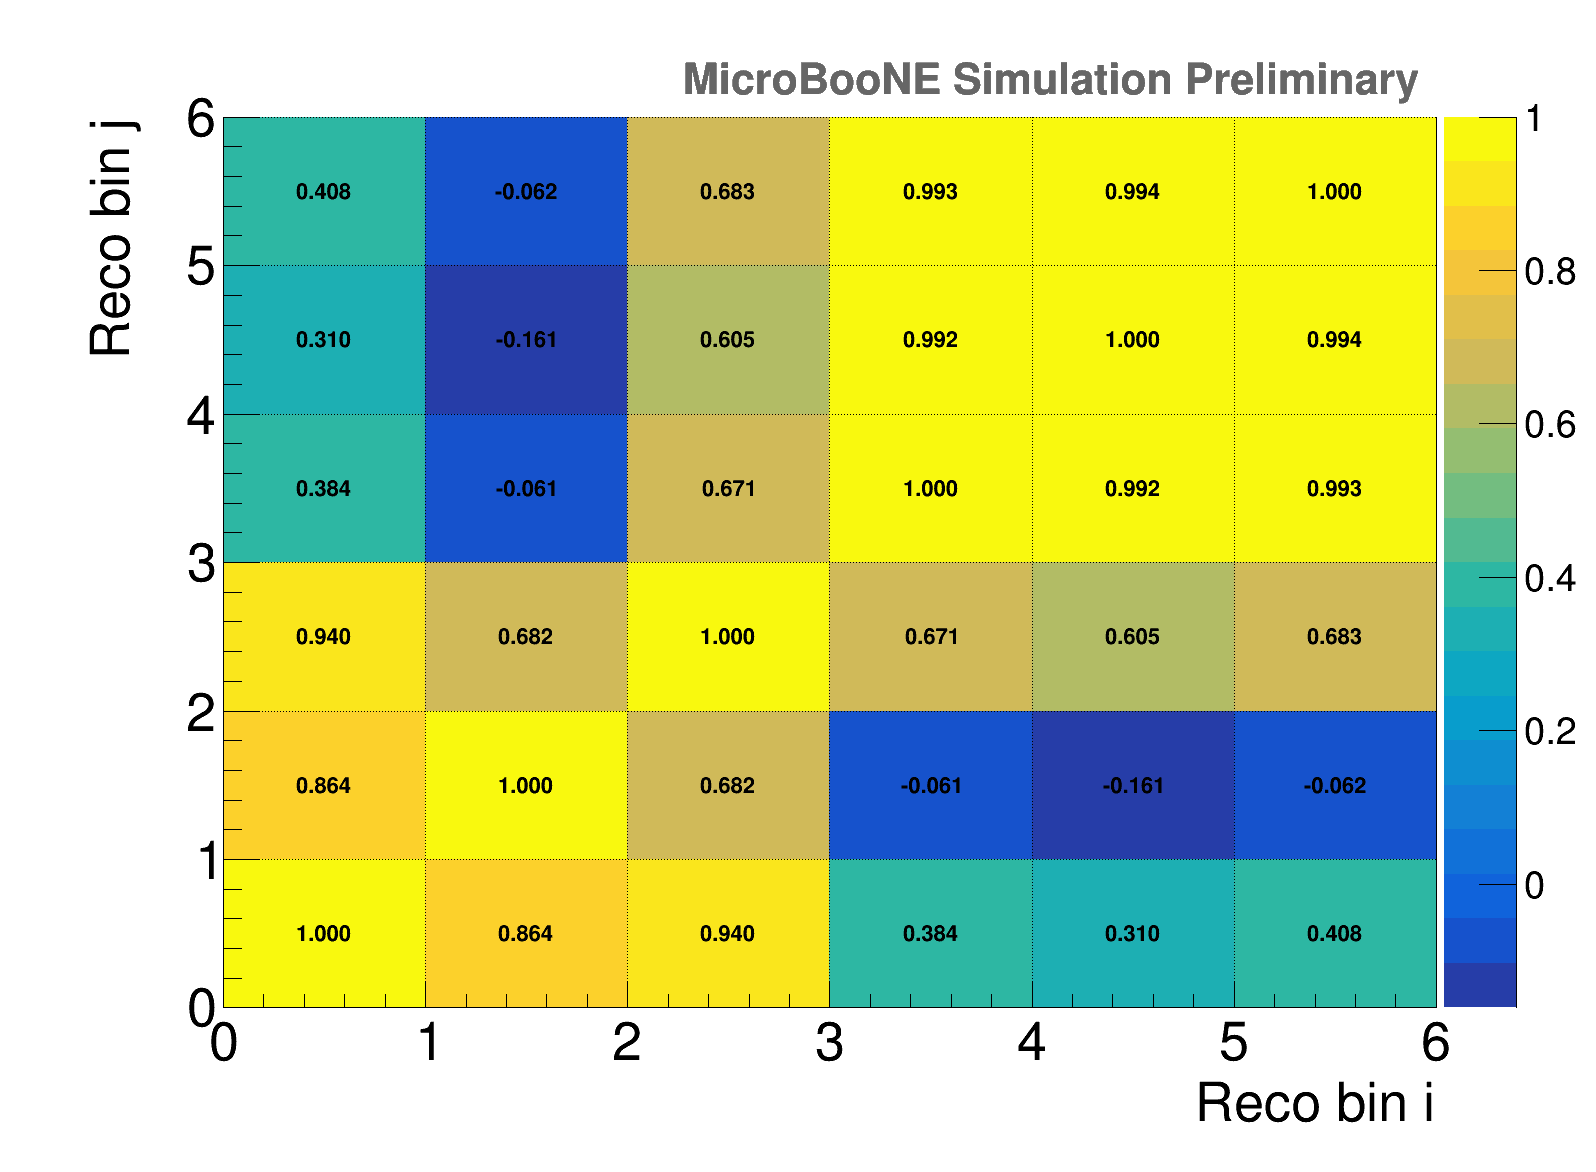

In [37]:
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation = ROOT.TH2D("h_correlation",'Correlation matrix',6,0,6,6,0,6)
for i in range(binnum):
    for j in range(binnum):
        h_correlation.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_correlation.SetMinimum(-1)
h_correlation.SetXTitle("Reco bin i")
h_correlation.SetYTitle("Reco bin j")
h_correlation.GetYaxis().SetTitleSize(0.05)
h_correlation.GetYaxis().SetTitleOffset(0.0)
h_correlation.GetYaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleSize(0.05)
h_correlation.GetXaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleOffset(1)
h_correlation.SetLineColor(ROOT.kBlack)
h_correlation.SetLineWidth(4)
#ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation.Draw('colz')
h_correlation.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_genie_other.png")
c1.SaveAs(outputdir_root + "h_correlation_genie_other.root")
c1.SaveAs(outputdir_pdf + "h_correlation_genie_other.pdf")
h_correlation.Write('h_correlation')

In [38]:
for para in range(num_para):
    for uni in range(num_universes):   
        print ''
        h_1d_xsec[para][uni].Scale(1e38)
h_cv.Scale(1e38)

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/png/h_1d_xsec_genie_other_stat.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/root/h_1d_xsec_genie_other_stat.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/pdf/h_1d_xsec_genie_other_stat.pdf has been created


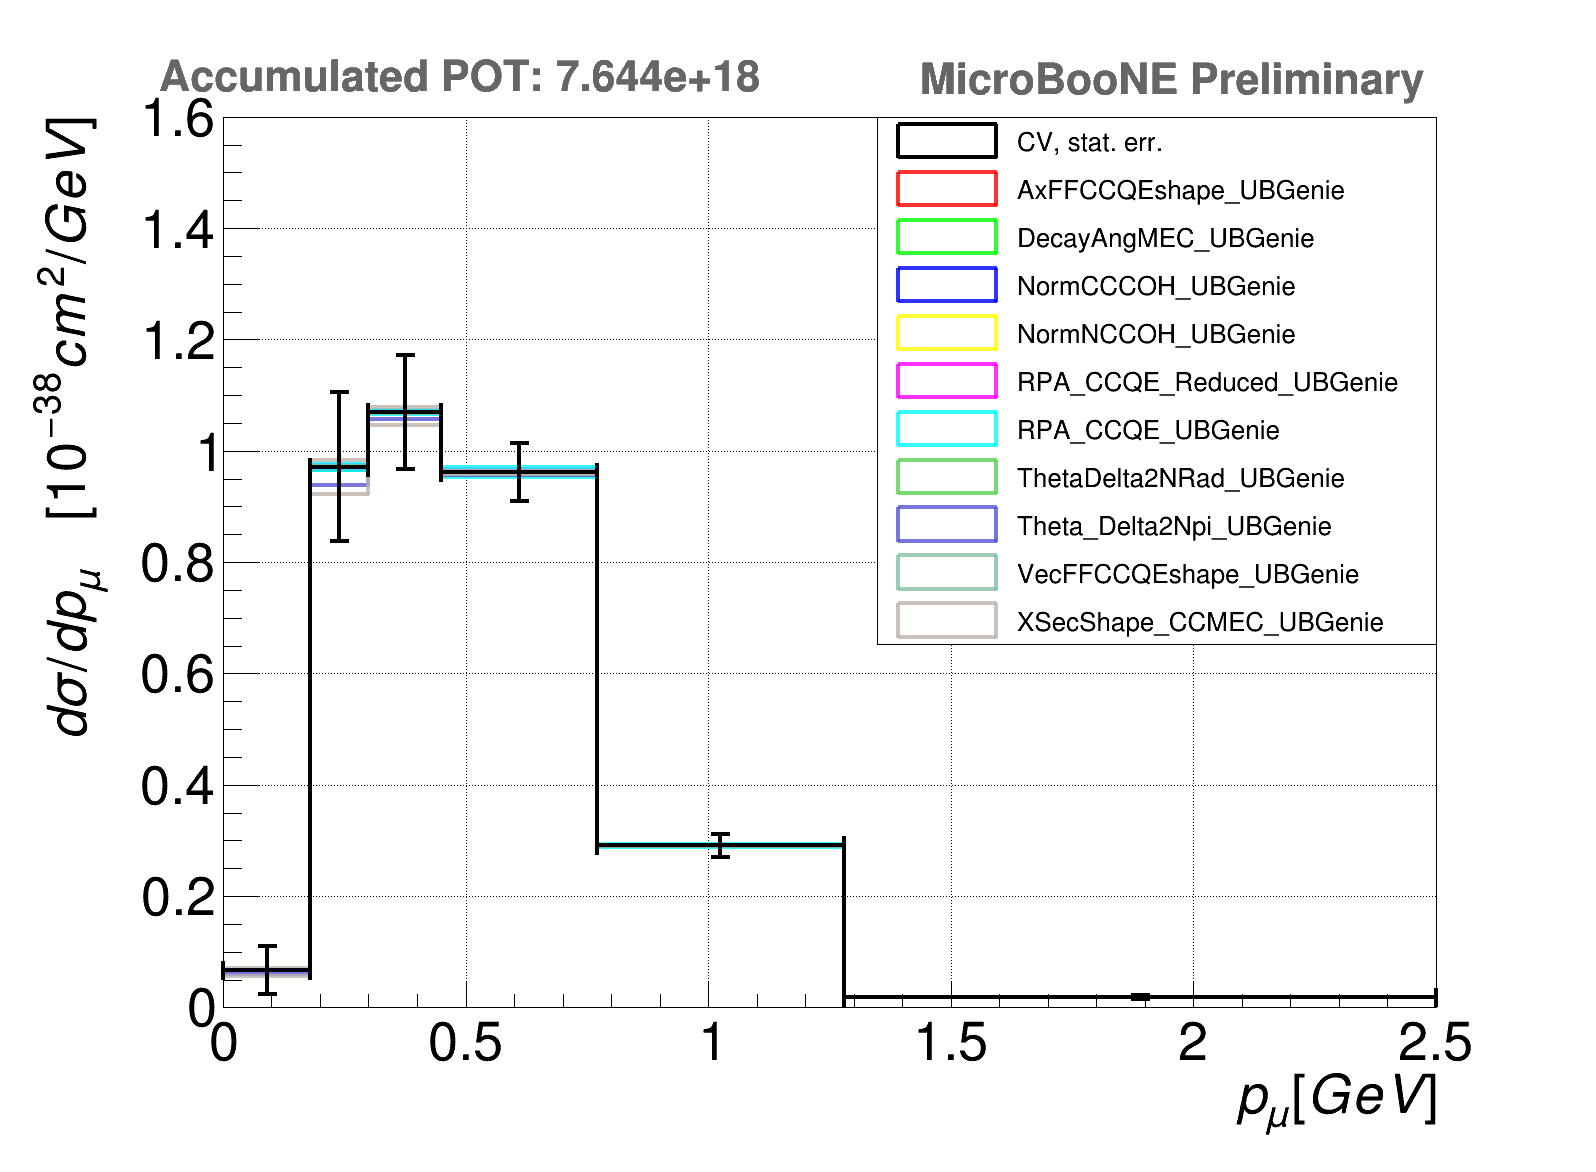

In [39]:
#stat error
h_cv.SetLineWidth(3)
h_cv.SetMaximum(1.6)
h_cv.SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_cv.SetXTitle("p_{\mu} [GeV]")
h_cv.GetYaxis().SetTitleSize(0.05)
h_cv.GetYaxis().SetTitleOffset(0.0)
h_cv.GetYaxis().SetLabelSize(0.05)
h_cv.GetXaxis().SetTitleSize(0.05)
h_cv.GetXaxis().SetLabelSize(0.05)
h_cv.GetXaxis().SetTitleOffset(1)
c1.SetRightMargin(0.1)
#h_covariance.SetLineColor(ROOT.kBlack)
h_cv.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
h_cv.Draw('HIST')
legend = ROOT.TLegend(0.55,0.45,0.9,0.9); #LEGEND RIGHT
legend.AddEntry(h_cv,'CV, stat. err.',"f")
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
for para in range(num_para):
    for uni in range(2):        
        h_1d_xsec[para][uni].Draw('HIST same ')
        h_1d_xsec[para][uni].SetMaximum(1.6)
        h_1d_xsec[para][uni].GetYaxis().SetTitleSize(0.05)
        h_1d_xsec[para][uni].GetYaxis().SetTitleOffset(0.0)
        h_1d_xsec[para][uni].GetYaxis().SetLabelSize(0.05)
        h_1d_xsec[para][uni].GetXaxis().SetTitleSize(0.05)
        h_1d_xsec[para][uni].GetXaxis().SetLabelSize(0.05)
        h_1d_xsec[para][uni].GetXaxis().SetTitleOffset(1)
        h_1d_xsec[para][uni].SetLineColorAlpha(para+2,0.8)
        if para+2==10:
            h_1d_xsec[para][uni].SetLineColorAlpha(30,0.8)
        #h_1d_xsec[para][uni].SetLineWidth(4)
        c1.SetRightMargin(0.1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_1d_xsec[para][uni].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(9)
        #print h_1d_xsec[para][uni].GetBinContent(3),' - ', h_1d_bkg[para][uni].GetBinContent(3)
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
legend.Draw()
h_cv.Draw('HIST E1 same')
h_stat = h_cv.Clone()
c1.Draw()
c1.SaveAs(outputdir_png + "h_1d_xsec_genie_other_stat.png")
c1.SaveAs(outputdir_root + "h_1d_xsec_genie_other_stat.root")
c1.SaveAs(outputdir_pdf + "h_1d_xsec_genie_other_stat.pdf")


0.0676523074508 0.00768491470269
0.971161603928 0.0337935565931
1.06929934025 0.0141304306383
0.961383640766 0.0193073690671
0.290991961956 0.00462544245102
0.0180704444647 0.00022916204604


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/png/h_1d_xsec_genie_other_sys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/root/h_1d_xsec_genie_other_sys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/pdf/h_1d_xsec_genie_other_sys.pdf has been created


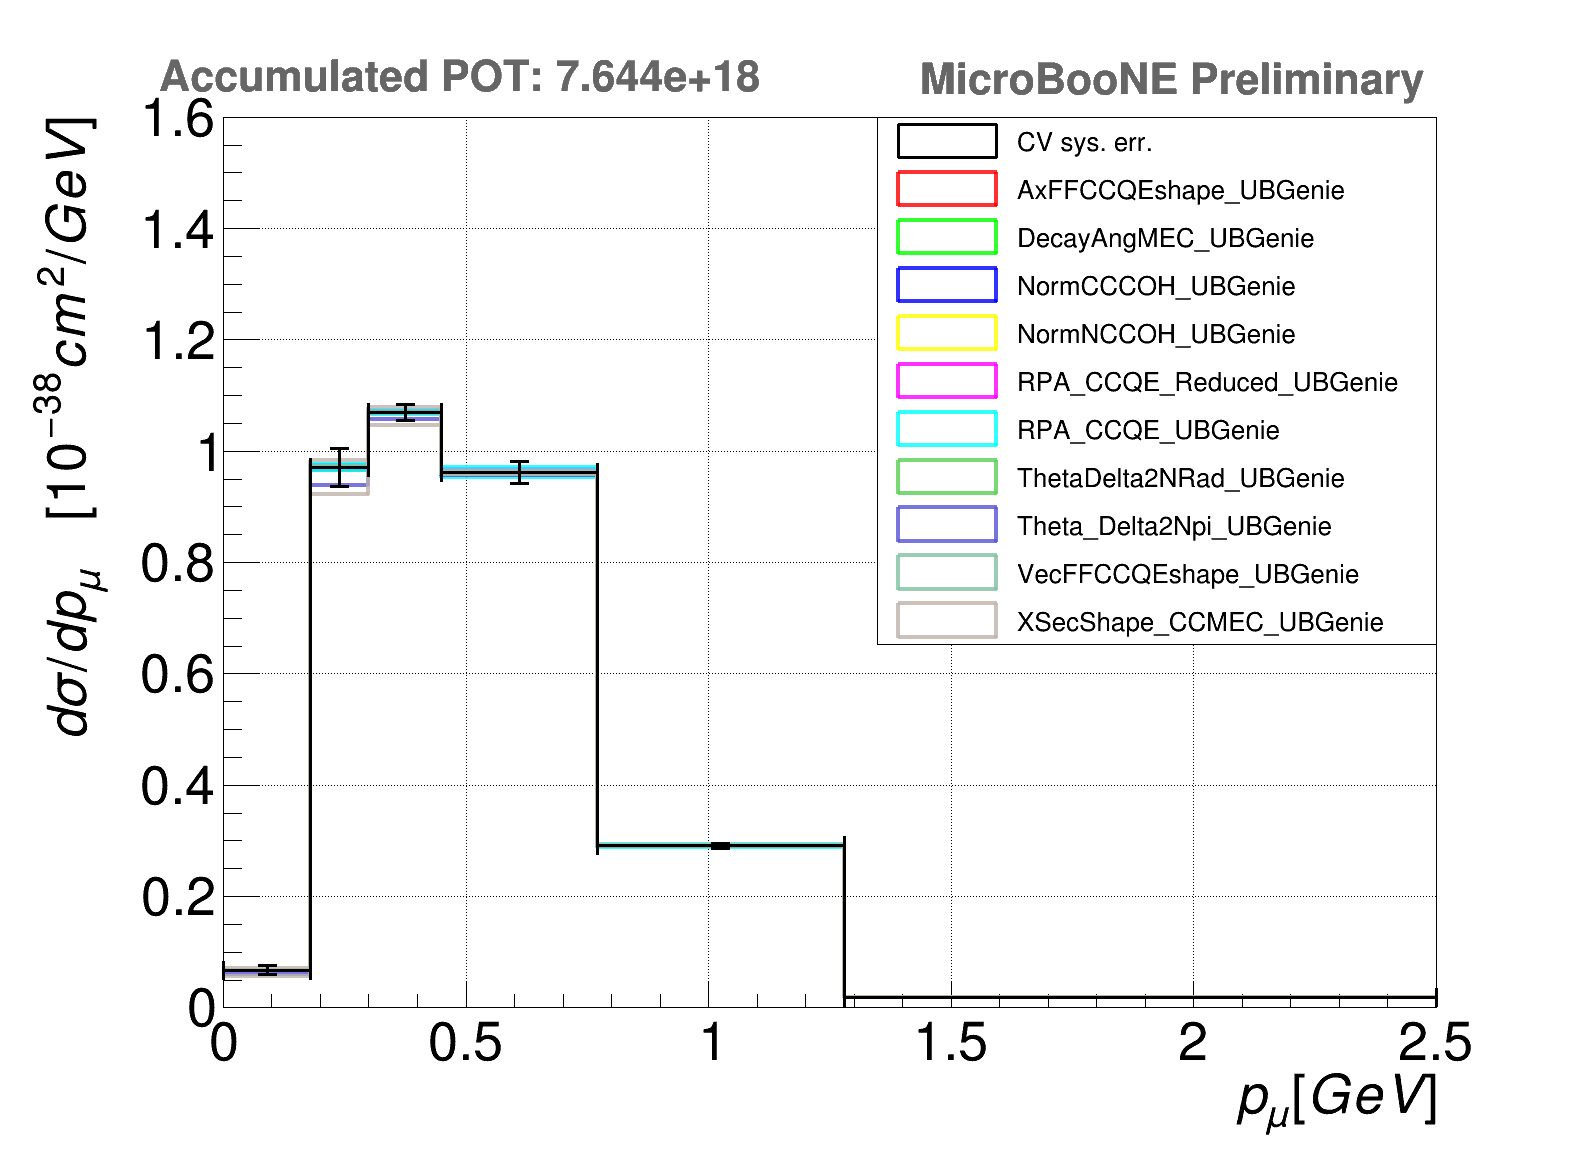

In [40]:
# only ststematic error
h_cv.SetLineWidth(3)
h_cv.SetMaximum(1.6)
h_cv.SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_cv.SetXTitle("p_{\mu} [GeV]")
h_cv.Draw('HIST')
legend = ROOT.TLegend(0.55,0.45,0.9,0.9); #LEGEND RIGHT
legend.AddEntry(h_cv,'CV sys. err.',"f")
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
for para in range(num_para):
    for uni in range(2):        
        h_1d_xsec[para][uni].Draw('HIST same ')
        h_1d_xsec[para][uni].SetMaximum(1.6)
        #print h_1d_xsec[para][uni].GetBinContent(3),' - ', h_1d_bkg[para][uni].GetBinContent(3)
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
legend.Draw()
for i in range(binnum):
    h_cv.SetBinError(i+1,math.sqrt(xsec_cov_matrix[i][i])*1e38)
    print h_cv.GetBinContent(i+1), h_cv.GetBinError(i+1)
h_cv.Draw('HIST E1 same')
c1.Draw()
c1.SaveAs(outputdir_png + "h_1d_xsec_genie_other_sys.png")
c1.SaveAs(outputdir_root + "h_1d_xsec_genie_other_sys.root")
c1.SaveAs(outputdir_pdf + "h_1d_xsec_genie_other_sys.pdf")


0.0676523074508 0.00768491470269
0.971161603928 0.0337935565931
1.06929934025 0.0141304306383
0.961383640766 0.0193073690671
0.290991961956 0.00462544245102
0.0180704444647 0.00022916204604


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/png/h_xsec_detsys_errdetsys_ratio.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/pdf/h_xsec_detsys_errdetsys_ratio.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/root/h_xsec_detsys_errdetsys_ratio.root has been created


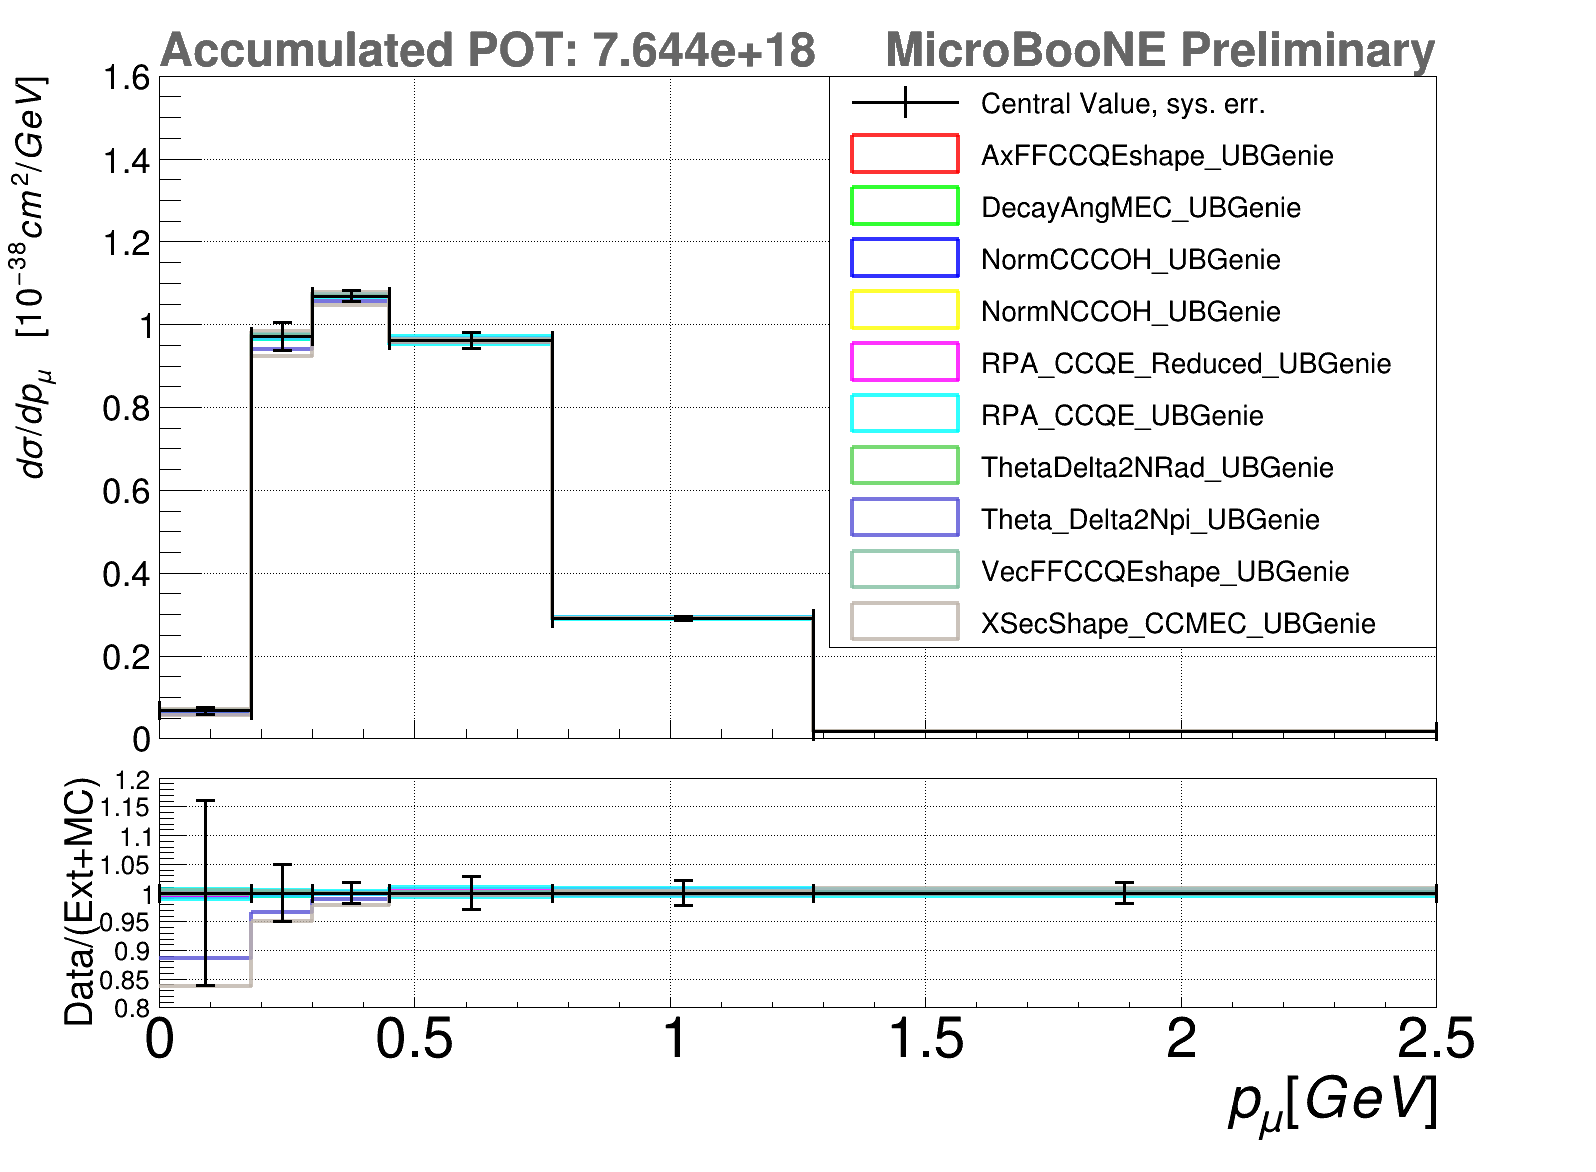

In [41]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
i = 0
#legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.52,0.15,0.9,0.9); #LEGEND RIGHT
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

h_cv.SetLineWidth(3)
h_cv.SetMaximum(1.6)
h_cv.SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_cv.SetXTitle("p_{\mu} [GeV]")
h_cv.GetXaxis().SetLabelOffset(999);
h_cv.GetXaxis().SetTitleOffset(999);
h_cv.GetXaxis().SetLabelSize(0);
h_cv.GetXaxis().SetTitleSize(0);
h_cv.Draw('HIST')
legend.AddEntry(h_cv,'Central Value, sys. err.',"lep")
prelim, pot_tex = draw_adding_ratio()
prelim.Draw()
pot_tex.Draw()
for para in range(num_para):
    for uni in range(2):        
        h_1d_xsec[para][uni].Draw('HIST same ')
        h_1d_xsec[para][uni].SetMaximum(1.6)
        #print h_1d_xsec[para][uni].GetBinContent(3),' - ', h_1d_bkg[para][uni].GetBinContent(3)
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
legend.Draw()
for i in range(binnum):
    h_cv.SetBinError(i+1,math.sqrt(xsec_cov_matrix[i][i])*1e38)
    print h_cv.GetBinContent(i+1), h_cv.GetBinError(i+1)
h_cv.Draw('HIST E1 same')

c1.cd()
h_cv.GetXaxis().SetLabelOffset(0);
h_cv.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
h_files2 = []
i = 0
h_files2.append(h_cv.Clone())
h_files2[i].SetYTitle('Data/(Ext+MC)')
h_files2[i].GetYaxis().SetTitleSize(0.1)
h_files2[i].GetYaxis().SetTitleOffset(0.3)
h_files2[i].GetYaxis().SetLabelSize(0.07)

h_files2[i].GetXaxis().SetTitleSize(0.15)
h_files2[i].GetXaxis().SetLabelSize(0.15)
h_files2[i].GetXaxis().SetTitleOffset(1)
h_files2[i].SetMinimum(0.8)
h_files2[i].SetMaximum(1.2)
h_files2[i].Draw('hist')
for para in range(num_para):
    for uni in range(2):   
        h_files2.append(h_1d_xsec[para][uni].Clone())
        h_files2[i].Divide(h_cv)
        h_files2[i].Draw('hist same')
        i+=1

h_files2[0].Draw('E1 same')
c1.Draw()
#del h_files2[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_errdetsys_ratio.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_errdetsys_ratio.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_errdetsys_ratio.root")

#h_files.clear()

In [42]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [43]:
h_cv.GetXaxis().SetLabelSize(0.05);
h_cv.GetXaxis().SetTitleSize(0.05);
h_cv.GetXaxis().SetLabelOffset(0);
h_cv.GetXaxis().SetTitleOffset(1);

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/png/h_xsec_genie_other_tot_error.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/root/h_xsec_genie_other_tot_error.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/pdf/h_xsec_genie_other_tot_error.pdf has been created


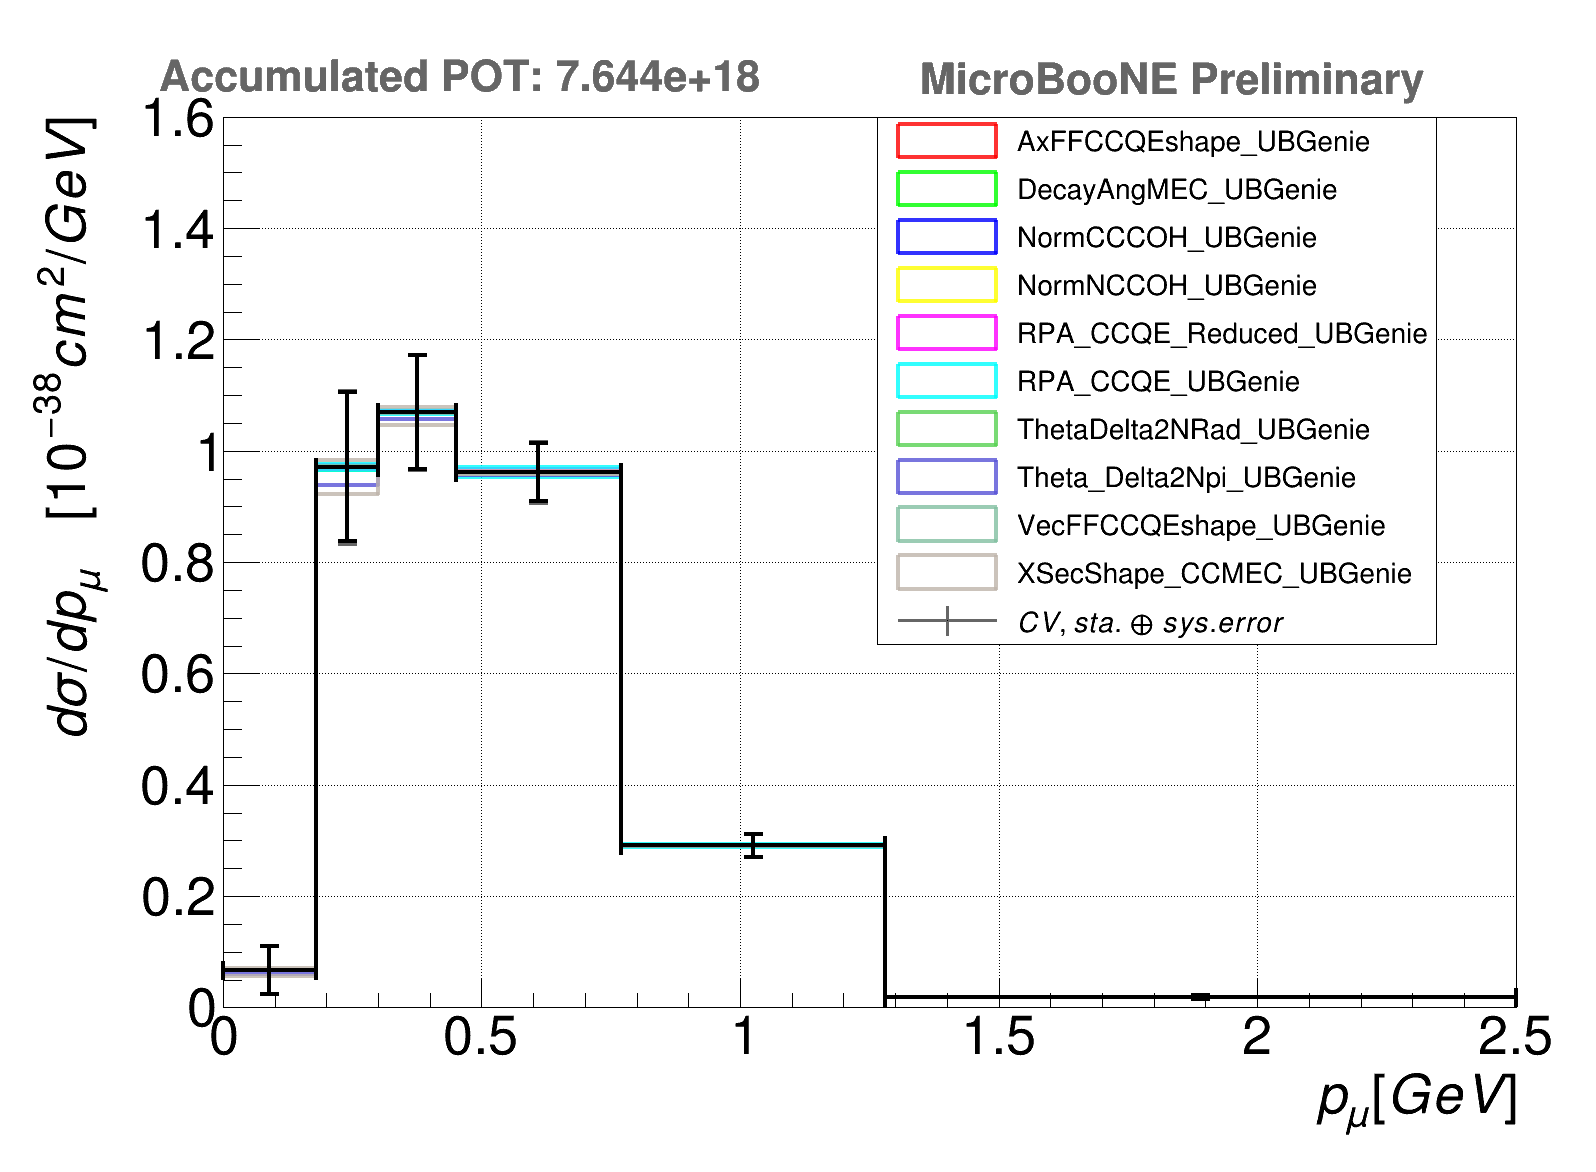

In [44]:
#with sys error
legend = ROOT.TLegend(0.55,0.45,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
h_cv.Draw('hist')
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
for para in range(num_para):
    for uni in range(num_universes):
        h_1d_xsec[para][uni].SetMaximum(1.6)
        #h_1d_xsec[para][uni].SetLineColorAlpha(ROOT.kRed,0.6)
        h_1d_xsec[para][uni].SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
        h_1d_xsec[para][uni].SetXTitle("p_{\mu} [GeV]")
        h_1d_xsec[para][uni].Draw('hist same')
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
for i in range(binnum):
    h_cv.SetBinError(i+1,math.sqrt(xsec_cov_matrix[i][i]*1e76+math.pow(h_stat.GetBinError(i+1),2)))
h_cv.SetLineColor(ROOT.kGray+2)
#legend.AddEntry(h_xsec[0],'All Genie                 ',"f")
legend.AddEntry(h_cv,'CV, sta. \oplus sys. error',"lep")
#legend.AddEntry(h_stat,'CV, stat. error',"lep")
legend.Draw()
h_cv.Draw('hist E1 same') 
h_stat.SetLineColor(ROOT.kBlack)
h_stat.Draw('hist E1 same')
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_genie_other_tot_error.png")
c1.SaveAs(outputdir_root + "h_xsec_genie_other_tot_error.root")
c1.SaveAs(outputdir_pdf + "h_xsec_genie_other_tot_error.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/png/h_eff_tilde_genie_other.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/root/h_eff_tilde_genie_other.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/pdf/h_eff_tilde_genie_other.pdf has been created


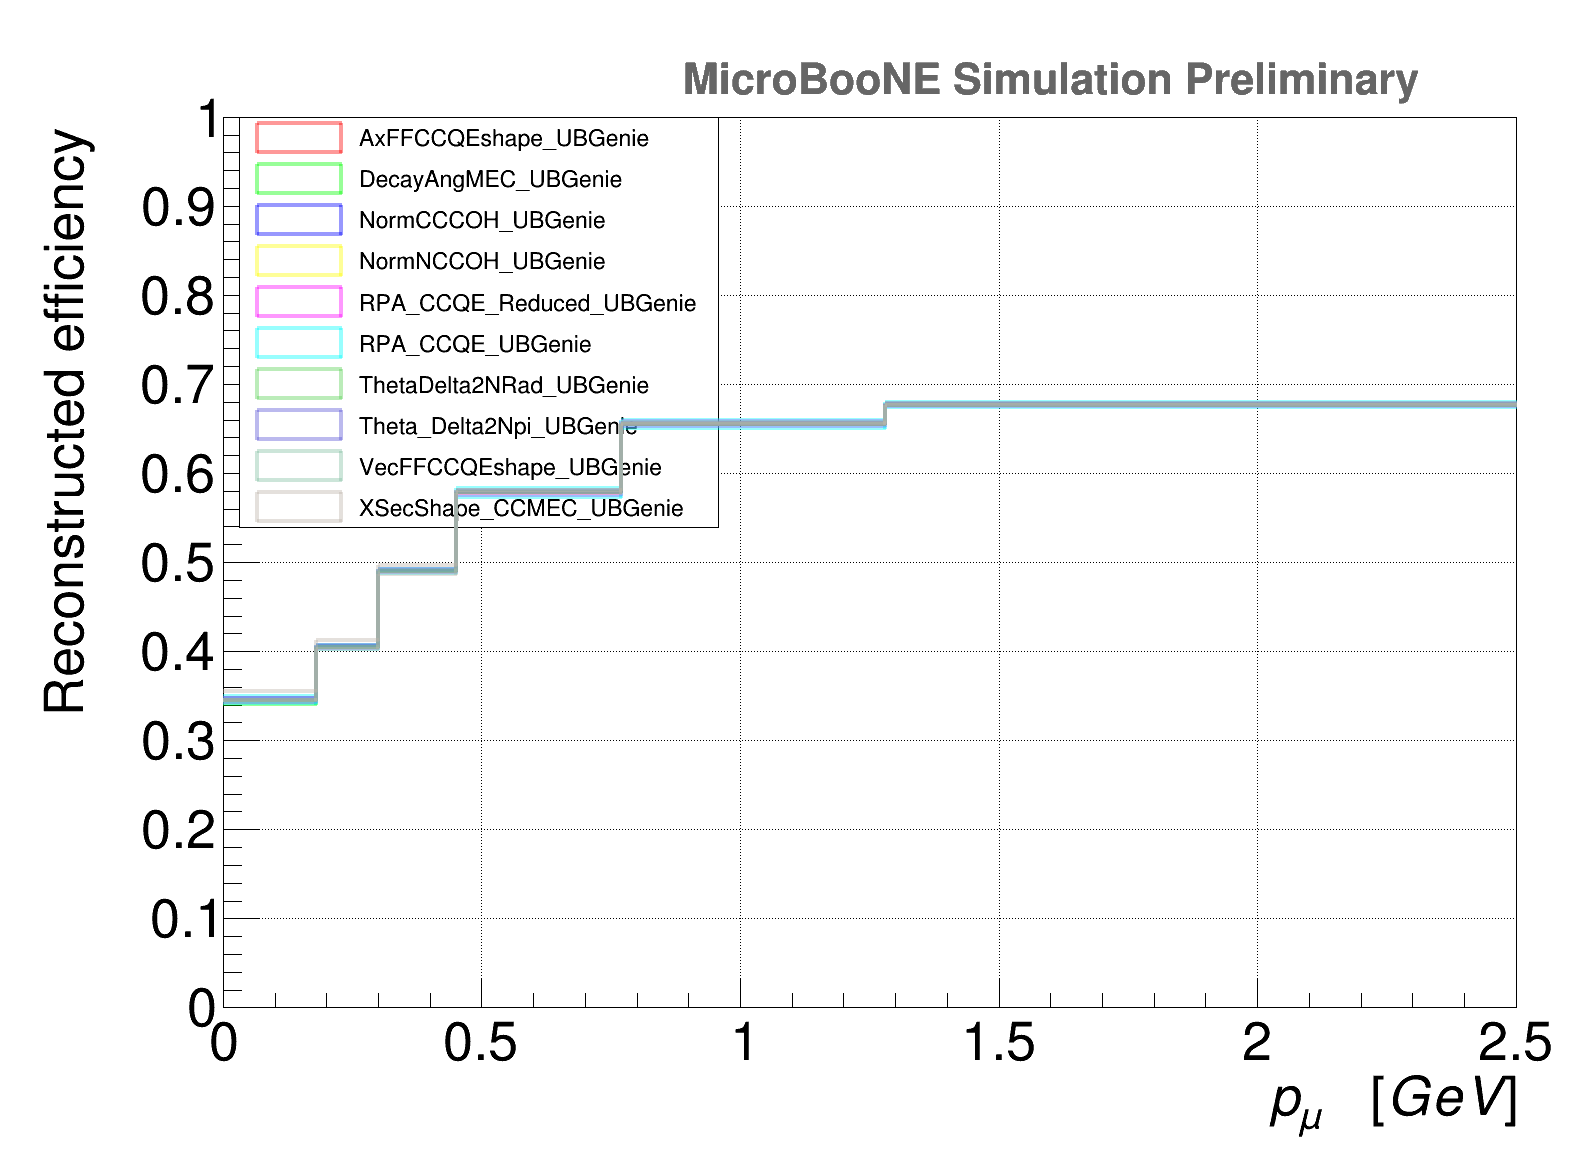

In [45]:
legend = ROOT.TLegend(0.15,0.55,0.45,0.9); #LEGEND LEFT
for para in range(num_para):
    for uni in range(2):        
        h_eff_tilde[para][uni].SetMaximum(1)
        h_eff_tilde[para][uni].SetMinimum(0)
        h_eff_tilde[para][uni].SetLineColorAlpha(para+2,0.4)
        if para+2==10:
            h_eff_tilde[para][uni].SetLineColorAlpha(30,0.4)
        h_eff_tilde[para][uni].SetLineWidth(3)
        h_eff_tilde[para][uni].SetYTitle("Reconstructed efficiency")
        h_eff_tilde[para][uni].SetXTitle("p_{\mu} \t [GeV]")
        h_eff_tilde[para][uni].GetYaxis().SetTitleSize(0.05)
        h_eff_tilde[para][uni].GetYaxis().SetTitleOffset(0.0)
        h_eff_tilde[para][uni].GetYaxis().SetLabelSize(0.05)
        h_eff_tilde[para][uni].GetXaxis().SetTitleSize(0.05)
        h_eff_tilde[para][uni].GetXaxis().SetLabelSize(0.05)
        h_eff_tilde[para][uni].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_eff_tilde[para][uni].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(9)
        if(para == 0 and uni==0):
            
            h_eff_tilde[para][uni].Draw('HIST')
            legend.Draw()
        else:
            h_eff_tilde[para][uni].Draw('HIST same ')

    legend.AddEntry(h_eff_tilde[para][uni],weight_list_flux[para],"f")
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_genie_other.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_genie_other.root")
c1.SaveAs(outputdir_pdf + "h_eff_tilde_genie_other.pdf")


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/png/h_eff_true_genie_other.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/root/h_eff_true_genie_other.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_genie_other_mar18/pdf/h_eff_true_genie_other.pdf has been created


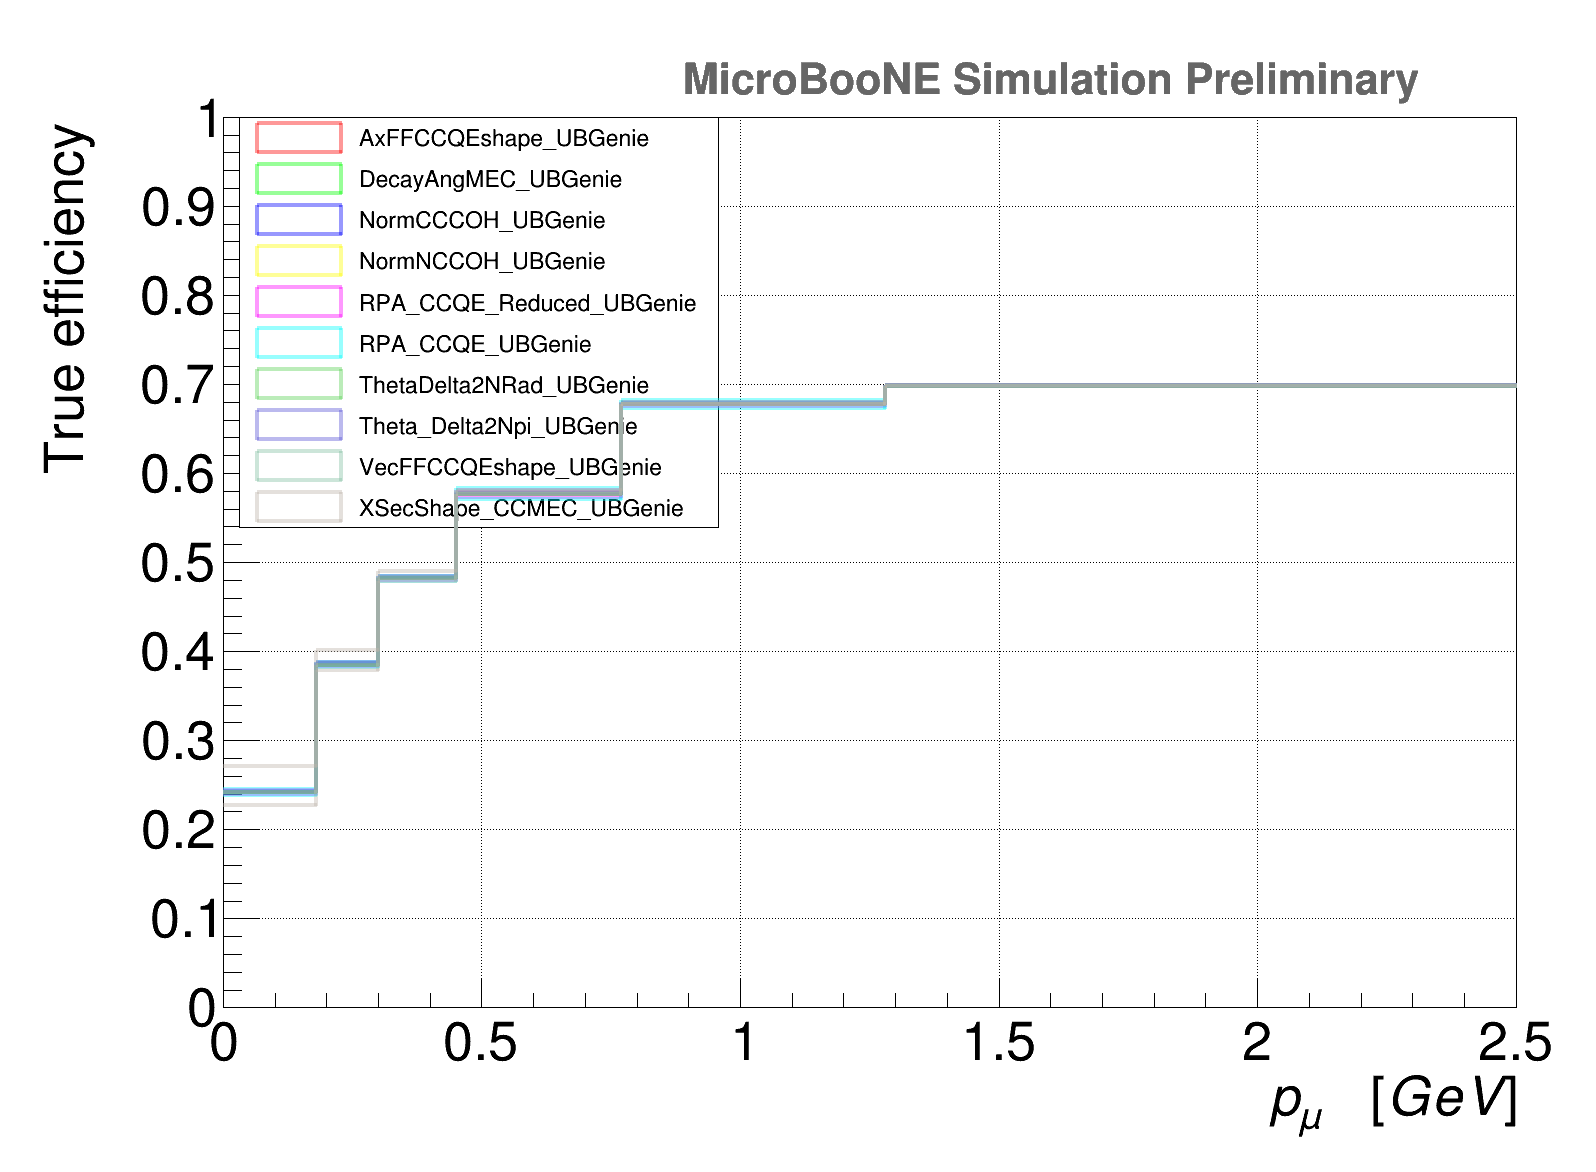

In [46]:
legend = ROOT.TLegend(0.15,0.55,0.45,0.9); #LEGEND LEFT
for para in range(num_para):
    for uni in range(num_universes):        
        h_eff_true[para][uni].SetMaximum(1)
        h_eff_true[para][uni].SetMinimum(0)
        h_eff_true[para][uni].SetLineColorAlpha(para+2,0.4)
        if para+2==10:
            h_eff_true[para][uni].SetLineColorAlpha(30,0.4)
        h_eff_true[para][uni].SetLineWidth(3)
        h_eff_true[para][uni].SetYTitle("True efficiency")
        h_eff_true[para][uni].SetXTitle("p_{\mu} \t [GeV]")
        h_eff_true[para][uni].GetYaxis().SetTitleSize(0.05)
        h_eff_true[para][uni].GetYaxis().SetTitleOffset(0.0)
        h_eff_true[para][uni].GetYaxis().SetLabelSize(0.05)
        h_eff_true[para][uni].GetXaxis().SetTitleSize(0.05)
        h_eff_true[para][uni].GetXaxis().SetLabelSize(0.05)
        h_eff_true[para][uni].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_eff_true[para][uni].SetLineWidth(4)
        #ROOT.gStyle.SetEndErrorSize(5)
        if(para == 0 and uni==0):
            h_eff_true[para][uni].Draw('HIST')
            legend.Draw()
        else:
            h_eff_true[para][uni].Draw('HIST same ')

    legend.AddEntry(h_eff_true[para][uni],weight_list_flux[para],"f")
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_true_genie_other.png")
c1.SaveAs(outputdir_root + "h_eff_true_genie_other.root")
c1.SaveAs(outputdir_pdf + "h_eff_true_genie_other.pdf")


In [47]:
# close the root file with all the histos
RootFile.Close()